# **Telco Customer Churn**

The Telco customer churn data contains information about a fictional telco company that provided **home phone** and **Internet services** to 7043 customers in California in Q3 , It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.


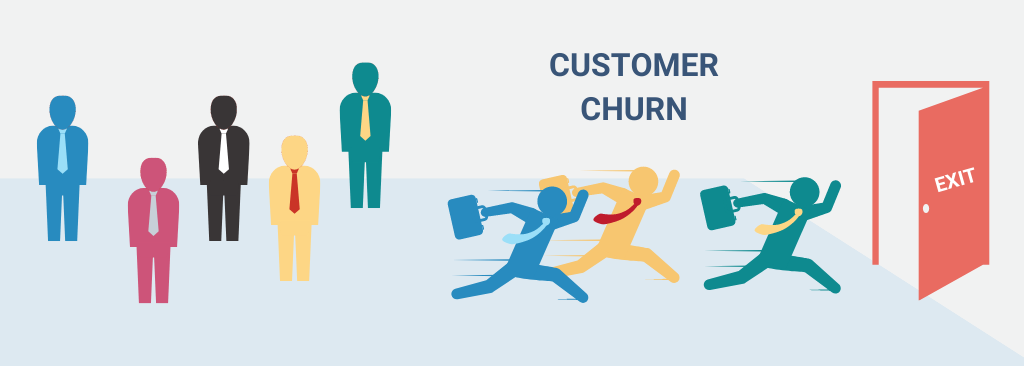

![image](https://newsdailyarticles.com/wp-content/uploads/2020/09/5-Effective-Tips-To-Reduce-Customer-Churn.jpg)

# **Import libraries**

In [ ]:
# Import required libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score, jaccard_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

# **Read CSV file**

In [ ]:
# Read csv file
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# **Data Exploration**

**Functions for visualization**

In [ ]:
# Building the function for visualization
def visualize_feature_frequency(df, feature,fig=(6.4,4.8)):
    # Set a better color palette
    sns.set_palette("pastel")

    # Set figure size
    plt.figure(figsize=fig)

    # Visualize the frequency for each value in the specified feature using seaborn
    ax = sns.countplot(x=feature, data=df)

    # Add annotations with the count on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 1),
                    textcoords='offset points')

    # Set labels and title
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Frequency of {feature}')

    # Show the plot
    plt.show()

In [ ]:
# Building function to represent set of features with Churn
def plot_churn_distribution(df, feature, hue='Churn',figs=(8, 6)):
    # Set the style of the visualization
    sns.set(style="whitegrid")

    # Create a count plot to visualize the specified feature with churn
    plt.figure(figsize=figs)
    ax = sns.countplot(x=feature, hue=hue, data=df, palette='pastel')

    # Add percentages on top of each bar
    total = len(df[feature])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                f'{height/total:.1%}',
                ha="center")

    # Add labels and title
    plt.xlabel(feature.capitalize())  # Capitalize the feature name for better display
    plt.ylabel('Count')
    plt.title(f'{hue} Distribution by {feature.capitalize()}')

    # Add legend for clarity
    # plt.legend(title=hue, loc='upper right')
    plt.legend(title=hue)


    # Show the plot
    plt.show()

In [ ]:
# Function to plot the density of MonthlyCharges and TotalCharges
def histogram_plots(df, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)

    fig = plt.figure(figsize=(12,5*number_of_rows))

    for index, column in enumerate(numerical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.kdeplot(df[column][df[target]=="Yes"] ,fill = True)
        ax = sns.kdeplot(df[column][df[target]=="No"], fill = True)
        ax.set_title(column)
        ax.legend(["Churn","No Churn"], loc='upper right')
    plt.savefig("numerical_variables.png", dpi=300)
    return plt.show()

In [ ]:
# plot the destribtion of set of fatures using histohram
def density(df,feature):
  plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
  # Add labels and title
  plt.xlabel(f'{feature.capitalize()}')
  plt.ylabel('Density')
  plt.title(f'Distribution of {feature.capitalize()}')
  # Show the plot
  plt.show()

In [ ]:
# print set of random samples from data
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1466,8205-MQUGY,Male,0,Yes,Yes,12,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,49.20,571.15,No
5900,0117-LFRMW,Male,0,Yes,Yes,37,No,No phone service,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),40.20,1448.8,Yes
1838,8058-DMYRU,Male,1,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,4931.8,No
6490,3985-HOYPM,Male,0,No,No,26,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,525.55,No
3727,9057-SIHCH,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.60,291.9,Yes
4021,4255-DDUOU,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.50,20.5,Yes
4797,3892-NXAZG,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8289.2,No
6664,4480-MBMLB,Female,0,No,No,36,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),104.80,3886.45,No
1389,8621-MNIHH,Female,1,Yes,No,34,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,94.25,3217.55,Yes
5189,6907-FLBER,Male,0,No,No,1,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,54.30,54.3,No


In [ ]:
# Discover all features in data
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- CustomerID: A unique ID that identifies each customer.

- Gender: The customer’s gender: Male, Female

- Senior Citizen: Indicates if the customer is 65 or older: Yes, No

- Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

- tenure : Number of months the customer has stayed with the company

- Partner : Whether the customer has a partner or not (Yes, No)

- PhoneService : Whether the customer has a phone service or not (Yes, No)

- MultipleLines
Whether the customer has multiple lines or not (Yes, No, No phone service)

- InternetService : Customer’s internet service provider (DSL, Fiber optic, No)

- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

- OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)

- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

- TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)

- Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

- Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

- Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

- Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

- Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

- Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

- Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

- Churn : The Churn Label column indicates whether or not the customer left within the last month



In [ ]:
# Get the datatype of each feature
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Get information about the data (datatype and number of non-null values in each column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Print statistical information about data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Get the number of records
# represents the number of customers that used the services of telco company
print(f"The number of records are : {len(df)} records")

The number of records are : 7043 records


In [ ]:
# print the number of features
print(f"The number of features are : {df.shape[1]} features")

The number of features are : 21 features


In [ ]:
# Print the shape of data
print(f"The shape of data is : {df.shape}")

The shape of data is : (7043, 21)


In [ ]:
# Get columns that data type is 'int' or 'float'
numerical_features=df.select_dtypes(include=['int', 'float'])
print(numerical_features.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [ ]:
# Get columns that data type is 'object'
object_features=df.select_dtypes(include=['object'])
print(object_features.columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


**customerID**

In [ ]:
# The number of customers in data
print(f"The number of customers : {len(df['customerID'])} customers ")

The number of customers : 7043 customers 


In [ ]:
# The number of unique customers in data
print(f"The number of unique customers : {df['customerID'].nunique()} customers ")

The number of unique customers : 7043 customers 


No duplicates in the 'customerID' column.

**gender**

In [ ]:
# Get unique values in gender feature
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# Get the frequency for each value in gender feature
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

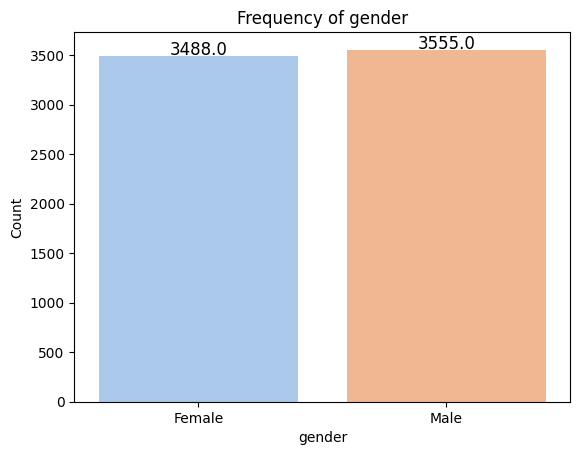

In [ ]:
# Call the function to create a visualization of the gender feature.
visualize_feature_frequency(df, 'gender')

- The company has approximately the same number of male and female customers

- This implies that both males and females find the company's services very useful for them.





In [ ]:
# Print the percentage of "Male" in data
print(f"The percentage of male in data is :{round((len(df[df['gender']=='Male'])/len(df))*100,2)}% ")

The percentage of male in data is :50.48% 


In [ ]:
# Print the percentage of "Female" in data
print(f"The percentage of female in data is :{round((len(df[df['gender']=='Female'])/len(df))*100,2)}% ")

The percentage of female in data is :49.52% 


**SeniorCitizen**

In [ ]:
# Get the frequency of SeniorCitizen
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Most customers using these services are under the age of 65, but there are a few customers who use these services and are aged 65 or older.

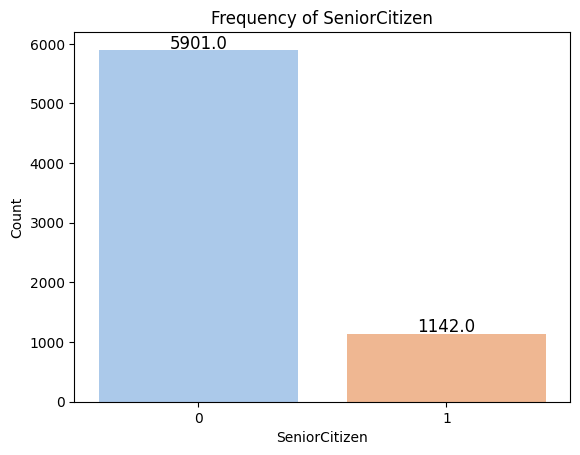

In [ ]:
# Call the function to create a visualization of the SeniorCitizen feature.
visualize_feature_frequency(df, 'SeniorCitizen')

In [ ]:
# Print the percentage of Customers who their age less than 65 and use services of company
print(f"The percentage of Customers who their age less than 65 is :{round((len(df[df['SeniorCitizen']==0])/len(df))*100,2)}% ")

The percentage of Customers who their age less than 65 is :83.79% 


In [ ]:
# Print the percentage of Customers who their age greater than or equal 65 and use services of company
print(f"The percentage of Customers who their age less than 65 is :{round((len(df[df['SeniorCitizen']==1])/len(df))*100,2)}% ")

The percentage of Customers who their age less than 65 is :16.21% 


- This implies that the majority of customers using home services and internet services are under the age of 65

**Partner**

In [ ]:
# Get the frequency of Partner
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

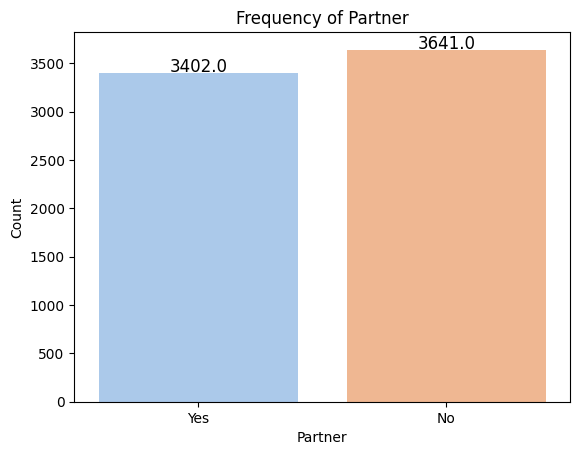

In [ ]:
# Call the function to create a visualization of the Partner feature.
visualize_feature_frequency(df, 'Partner')

- The company has approximately an equal number of customers with and without partners.

In [ ]:
# Get the percentage of customers that have partner
print(f"The percentage of Customers who have partners :{round((len(df[df['Partner']=='Yes'])/len(df))*100,2)}% ")

The percentage of Customers who have partners :48.3% 


In [ ]:
# Get the percentage of customers that have no partner
print(f"The percentage of Customers who have no partners :{round((len(df[df['Partner']=='No'])/len(df))*100,2)}% ")

The percentage of Customers who have no partners :51.7% 


**Dependents**

In [ ]:
# Get the number of unique value in Dependents column
df['Dependents'].nunique()

2

In [ ]:
# Print the values of Dependents column
df['Dependents'].values

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [ ]:
# Print the number of customers that have Dependents , Dependents could be children, parents, grandparents
print(f"The number of customers that have Dependents is {len(df[df['Dependents']=='Yes'])}")

The number of customers that have Dependents is 2110


In [ ]:
# Print the number of customers that not have Dependents , Dependents could be children, parents, grandparents
print(f"The number of customers that not have Dependents is {len(df[df['Dependents']=='No'])}")

The number of customers that not have Dependents is 4933


In [ ]:
# Get the percentage of customers that have Dependents
print(f"The percentage of customers that have Dependents :{round((len(df[df['Dependents']=='Yes'])/len(df))*100,2)}% ")

The percentage of customers that have Dependents :29.96% 


In [ ]:
# Get the percentage of customers that have no Dependents
print(f"The percentage of customers that have no Dependents :{round((len(df[df['Dependents']=='No'])/len(df))*100,2)}% ")

The percentage of customers that have no Dependents :70.04% 


- Approximately 70% of customers have no dependents, while a few of them have dependents.

- We can predict that the most people that use home services and internet services have no dependents

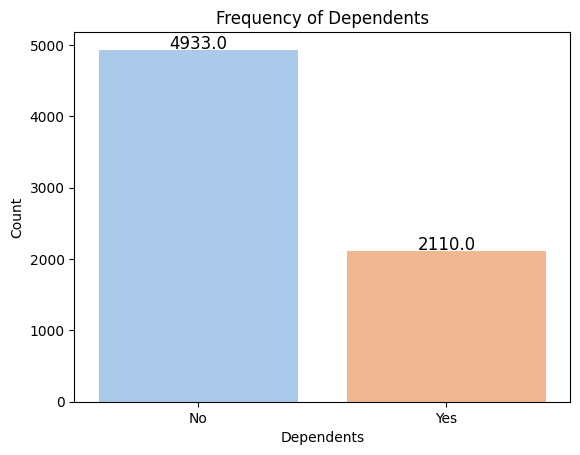

In [ ]:
# Call the function to create a visualization of the dependents feature.
visualize_feature_frequency(df, 'Dependents')

**PhoneService**

In [ ]:
# Print the number of people that use phone services
print(f"The number of customers that use phone services is : {len(df[df['PhoneService']=='Yes'])}")

The number of customers that use phone services is : 6361


In [ ]:
# Print the number of people who do not use phone services.
print(f"The number of people who do not use phone services is : {len(df[df['PhoneService']=='No'])}")

The number of people who do not use phone services is : 682


In [ ]:
# Get the percentage of customers using phone services.
print(f"The percentage of customers using phone services is : {round((len(df[df['PhoneService']=='Yes'])/len(df))*100,2)}% ")

The percentage of customers using phone services is : 90.32% 


In [ ]:
# Get the percentage of customers not using phone services.
print(f"The percentage of customers not using phone services is : {round((len(df[df['PhoneService']=='No'])/len(df))*100,2)}% ")

The percentage of customers not using phone services is : 9.68% 


- Since the majority of customers use phone services, it implies that the phone services provided by the company are highly useful and beneficial for customers.

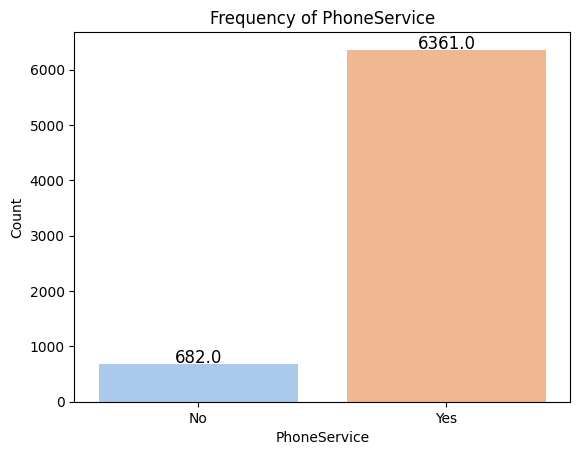

In [ ]:
# Call the function to create a visualization of the PhoneService feature.
visualize_feature_frequency(df, 'PhoneService')

**MultipleLines**

In [ ]:
# Print the number of people that use MultipleLines services and they have phone services
print(f"The number of customers that use MultipleLines services is : {len(df[df['MultipleLines']=='Yes'])}")

The number of customers that use MultipleLines services is : 2971


In [ ]:
# Print the number of people who do not use MultipleLines services , and they have phone services
print(f"The number of people who do not use MultipleLines services is ,and they have phone services : {len(df[df['MultipleLines']=='No'])}")

The number of people who do not use MultipleLines services is ,and they have phone services : 3390


In [ ]:
# Print the number of people who do not use MultipleLines services because thay have not phone services
print(f"The number of customers that use MultipleLines services is : {len(df[df['MultipleLines']=='No phone service'])}")

The number of customers that use MultipleLines services is : 682


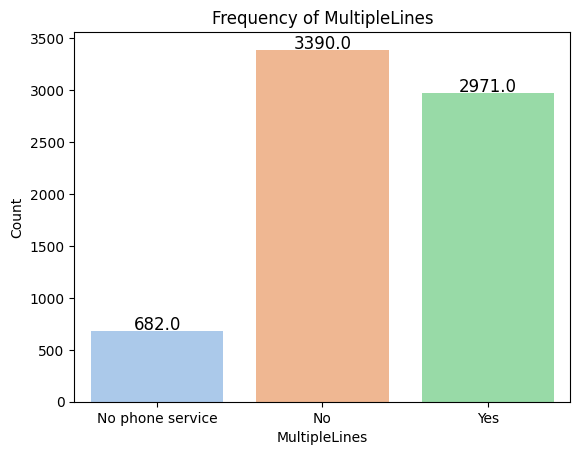

In [ ]:
# Call the function to create a visualization of the MultipleLines feature.
visualize_feature_frequency(df, 'MultipleLines')

In [ ]:
# Customers who not use the services
print(f"The percentage the customers who not use MultipleLines services :{round((len(df[df['MultipleLines']=='No']) /(len(df[df['MultipleLines']=='No'])+len(df[df['MultipleLines']=='Yes'])))*100,2)} %")

The percentage the customers who not use MultipleLines services :53.29 %


In [ ]:
# Customers who use the services
print(f"The percentage the customers who use MultipleLines services :{round((len(df[df['MultipleLines']=='Yes']) /(len(df[df['MultipleLines']=='No'])+len(df[df['MultipleLines']=='Yes'])))*100,2)} %")

The percentage the customers who use MultipleLines services :46.71 %


- There are around 3400 customers don't use MultipleLines despite of
 they use phone services

- There are around 3000 customers use the services

- This implies that half of the customers do not use MultipleLines services, which could indicate potential issues or shortcomings with the service

**tenure**

In [ ]:
# Retrieve the customer ID of the customer with the longest stay using the company's services.
max=df['tenure'].max()
print(f'The number of customers that have the same maximum usage of company  is {len(df[df["tenure"]==max])}')
list(df[df['tenure']==max]['customerID'])

The number of customers that have the same maximum usage of company  is 362


['5248-YGIJN',
 '6234-RAAPL',
 '5954-BDFSG',
 '0526-SXDJP',
 '9848-JQJTX',
 '6728-DKUCO',
 '2848-YXSMW',
 '6734-PSBAW',
 '3146-MSEGF',
 '5997-OPVFA',
 '9680-NIAUV',
 '7255-SSFBC',
 '6348-SNFUS',
 '9286-BHDQG',
 '7083-MIOPC',
 '7301-ABVAD',
 '6614-FHDBO',
 '9880-TDQAC',
 '3520-FJGCV',
 '8204-YJCLA',
 '7606-BPHHN',
 '7781-HVGMK',
 '4376-KFVRS',
 '1090-ESELR',
 '1480-BKXGA',
 '5968-XQIVE',
 '5168-MQQCA',
 '7971-HLVXI',
 '3649-JPUGY',
 '8606-CIQUL',
 '6859-QNXIQ',
 '3580-HYCSP',
 '1352-HNSAW',
 '0742-LAFQK',
 '0619-OLYUR',
 '4723-BEGSG',
 '8207-DMRVL',
 '2469-DTSGX',
 '1775-KWJKQ',
 '0078-XZMHT',
 '8338-QIUNR',
 '4312-KFRXN',
 '7564-GHCVB',
 '7503-MIOGA',
 '2499-AJYUA',
 '6919-ELBGL',
 '5684-FJVYR',
 '1266-NZYUI',
 '8823-RLPWL',
 '4992-LTJNE',
 '0229-LFJAF',
 '9926-PJHDQ',
 '0392-BZIUW',
 '9778-OGKQZ',
 '7408-OFWXJ',
 '6007-TCTST',
 '8374-UULRV',
 '5275-PMFUT',
 '1937-OTUKY',
 '3865-YIOTT',
 '6024-RUGGH',
 '4079-WWQQQ',
 '5787-KXGIY',
 '6115-ZTBFQ',
 '8165-ZJRNM',
 '2545-LXYVJ',
 '4829-ZLJ

There are 362 customers that still use the company services around 72 months (6 years)

In [ ]:
# Retrieve the customer ID of the customer with the shortest stay using the company's services.
min=df['tenure'].min()
print(f'The number of customers that have the same minumum usage of company  is {len(df[df["tenure"]==min])}')
list(df[df['tenure']==min]['customerID'])

The number of customers that have the same minumum usage of company  is 11


['4472-LVYGI',
 '3115-CZMZD',
 '5709-LVOEQ',
 '4367-NUYAO',
 '1371-DWPAZ',
 '7644-OMVMY',
 '3213-VVOLG',
 '2520-SGTTA',
 '2923-ARZLG',
 '4075-WKNIU',
 '2775-SEFEE']

- There are a few customers who have used the company's services for less than one month.

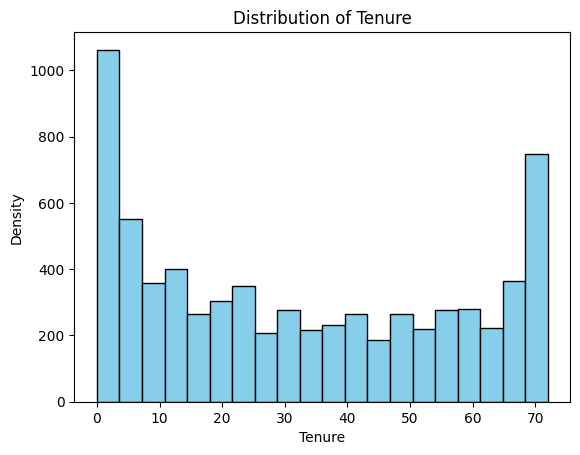

In [ ]:
# Plot the destribtion of tenure using histogram
density(df,'tenure')

In [ ]:
print(f"The percentage of customers have left the company after one year of usage is : {round((len(df[df['tenure']<=12])/len(df))*100,2)} %")

The percentage of customers have left the company after one year of usage is : 31.04 %


In [ ]:
print(f"The percentage of customers have left the company after two year of usage is : {round((len(df[df['tenure']<=24])/len(df))*100,2)} %")

The percentage of customers have left the company after two year of usage is : 45.58 %


In [ ]:
print(f"The percentage of customers have left the company after three year of usage is : {round((len(df[df['tenure']<=36])/len(df))*100,2)} %")

The percentage of customers have left the company after three year of usage is : 57.39 %


In [ ]:
print(f"The percentage of customers have left the company after four year of usage is : {round((len(df[df['tenure']<=48])/len(df))*100,2)} %")

The percentage of customers have left the company after four year of usage is : 68.21 %


In [ ]:
print(f"The percentage of customers have left the company after five year of usage is : {round((len(df[df['tenure']<=60])/len(df))*100,2)} %")

The percentage of customers have left the company after five year of usage is : 80.02 %


In [ ]:
print(f"The percentage of customers have left the company after six year of usage is : {round((len(df[df['tenure']<=72])/len(df))*100,2)} %")

The percentage of customers have left the company after six year of usage is : 100.0 %


**InternetService**

In [ ]:
# Get the unique values in 'InternetService'
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
# Get the percentage of each values in 'InternetService'
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
# Get the percentage of customers who use Fiber optic
print(f"The percentage of customers who use Fiber optic is :{round((len(df[df['InternetService']=='Fiber optic'])/len(df))*100,2)}% ")

The percentage of customers who use Fiber optic is :43.96% 


In [ ]:
# Get the percentage of customers who use DSL
print(f"The percentage of customers who use DSL is :{round((len(df[df['InternetService']=='DSL'])/len(df))*100,2)}% ")

The percentage of customers who use DSL is :34.37% 


In [ ]:
# Get the percentage of customers who not using the InternetService
print(f"The percentage of customers who not using the InternetService is :{round((len(df[df['InternetService']=='No'])/len(df))*100,2)}% ")

The percentage of customers who not using the InternetService is :21.67% 


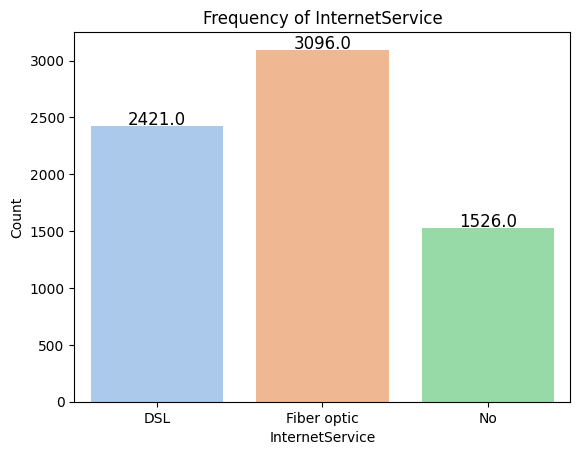

In [ ]:
# Call the function to create a visualization of the InternetService feature.
visualize_feature_frequency(df, 'InternetService')

- Most customers prefer to use 'Fiber optic' than 'DSL'

**OnlineSecurity**

In [ ]:
df['OnlineSecurity']

0        No
1       Yes
2       Yes
3       Yes
4        No
       ... 
7038    Yes
7039     No
7040    Yes
7041     No
7042    Yes
Name: OnlineSecurity, Length: 7043, dtype: object

In [ ]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [ ]:
# Get the percentage of customers who not using the OnlineSecurity because no internet service
print(f"The percentage of customers who not using the OnlineSecurity because no internet service is :{round((len(df[df['OnlineSecurity']=='No internet service'])/len(df))*100,2)}% ")

The percentage of customers who not using the OnlineSecurity because no internet service is :21.67% 


In [ ]:
# Get the percentage of customers who not using the OnlineSecurity despite of using internet service
print(f"The percentage of customers who not using the OnlineSecurity despite of using internet service is :{round((len(df[df['OnlineSecurity']=='No'])/len(df))*100,2)}% ")

The percentage of customers who not using the OnlineSecurity despite of using internet service is :49.67% 


In [ ]:
# Get the percentage of customers who using the OnlineSecurity
print(f"The percentage of customers who using the OnlineSecurity is :{round((len(df[df['OnlineSecurity']=='Yes'])/len(df))*100,2)}% ")

The percentage of customers who using the OnlineSecurity is :28.67% 


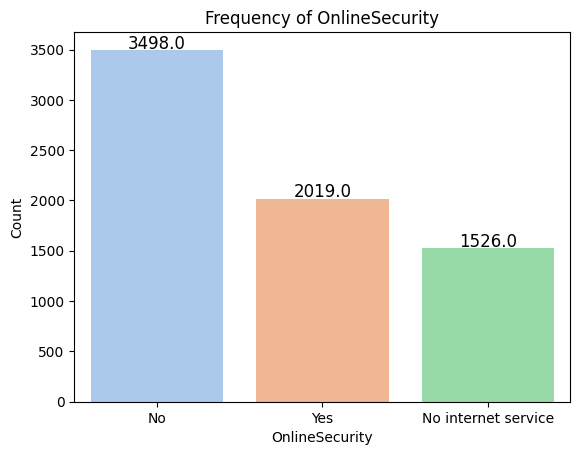

In [ ]:
# Call the function to create a visualization of the OnlineSecurity feature.
visualize_feature_frequency(df, 'OnlineSecurity')

- Since most customers do not use the Online Security services, this may indicate potential issues with this service.

**OnlineBackup**

In [ ]:
# Get the unique values in OnlineBackup services
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [ ]:
# Get the percentage of customers who not using the OnlineBackup because no internet service
print(f"The percentage of customers who not using the OnlineBackup because no internet service is :{round((len(df[df['OnlineBackup']=='No internet service'])/len(df))*100,2)}% ")

The percentage of customers who not using the OnlineBackup because no internet service is :21.67% 


In [ ]:
# Get the percentage of customers who not using the OnlineBackup despite of using internet service
print(f"The percentage of customers who not using the OnlineBackupdespite of using internet service is :{round((len(df[df['OnlineBackup']=='No'])/len(df))*100,2)}% ")

The percentage of customers who not using the OnlineBackupdespite of using internet service is :43.84% 


In [ ]:
# Get the percentage of customers who using the OnlineBackup
print(f"The percentage of customers who using the OnlineBackup is :{round((len(df[df['OnlineBackup']=='Yes'])/len(df))*100,2)}% ")

The percentage of customers who using the OnlineBackup is :34.49% 


- Indicates that the most customers not subscribes to an additional online security service provided by this company

**DeviceProtection**

In [ ]:
# Get the frequency of DeviceProtection
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [ ]:
# Get the percentage of customers who not using the DeviceProtection because no internet service
print(f"The percentage of customers who not using the DeviceProtection because no internet service is :{round((len(df[df['DeviceProtection']=='No internet service'])/len(df))*100,2)}% ")

The percentage of customers who not using the DeviceProtection because no internet service is :21.67% 


In [ ]:
# Get the percentage of customers who not using the DeviceProtection despite of using internet service
print(f"The percentage of customers who not using the DeviceProtection of using internet service is :{round((len(df[df['DeviceProtection']=='No'])/len(df))*100,2)}% ")

The percentage of customers who not using the DeviceProtection of using internet service is :43.94% 


In [ ]:
# Get the percentage of customers who using the DeviceProtection
print(f"The percentage of customers who using the DeviceProtection is :{round((len(df[df['DeviceProtection']=='Yes'])/len(df))*100,2)}% ")

The percentage of customers who using the DeviceProtection is :34.39% 


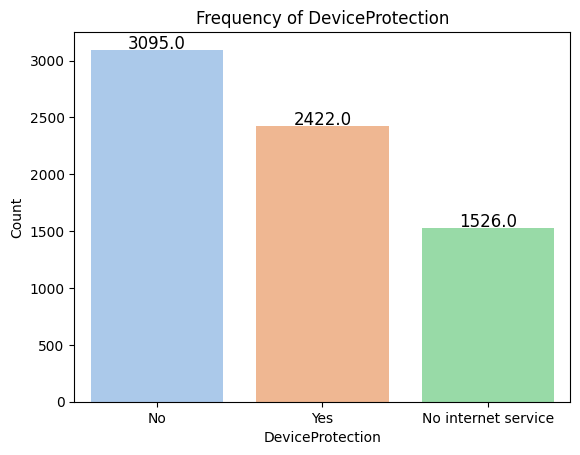

In [ ]:
# Call the function to create a visualization of the DeviceProtection feature.
visualize_feature_frequency(df, 'DeviceProtection')

- Indicates that the most customers not subscribes to an additional Device Protection service provided by this company

**TechSupport**

In [ ]:
# Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times
df['TechSupport']

0        No
1        No
2        No
3       Yes
4        No
       ... 
7038    Yes
7039     No
7040     No
7041     No
7042    Yes
Name: TechSupport, Length: 7043, dtype: object

In [ ]:
# Get the unique values in this column
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
# Get the percentage of customers who not using the TechSupport because no internet service
print(f"The percentage of customers who not using the TechSupport because no internet service is :{round((len(df[df['TechSupport']=='No internet service'])/len(df))*100,2)}% ")

The percentage of customers who not using the TechSupport because no internet service is :21.67% 


In [ ]:
# Get the percentage of customers who not using the TechSupport despite of using internet service
print(f"The percentage of customers who not using the TechSupport of using internet service is :{round((len(df[df['TechSupport']=='No'])/len(df))*100,2)}% ")

The percentage of customers who not using the TechSupport of using internet service is :49.31% 


In [ ]:
# Get the percentage of customers who using the TechSupport
print(f"The percentage of customers who using the TechSupport is :{round((len(df[df['TechSupport']=='Yes'])/len(df))*100,2)}% ")

The percentage of customers who using the TechSupport is :29.02% 


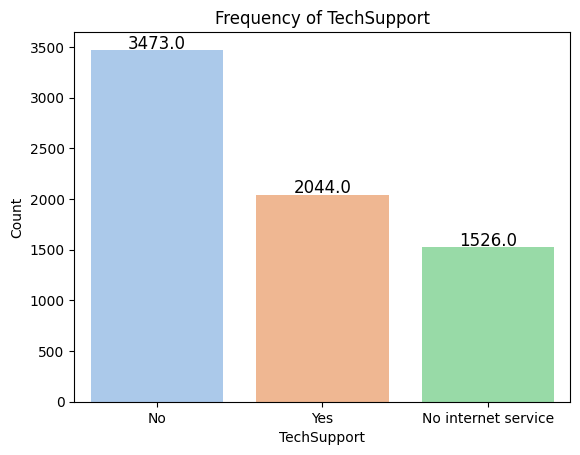

In [ ]:
# Call the function to create a visualization of the TechSupport feature.
visualize_feature_frequency(df, 'TechSupport')

- Indicates that the most customers not subscribes to an additional technical support plan from the company with reduced wait times , which may lead to a problem in this service

**StreamingTV**

In [ ]:
# Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
df['StreamingTV']

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingTV, Length: 7043, dtype: object

In [ ]:
# Get the customer who using their Internet service to stream television programing
print(f"The customer who using their Internet service to stream television programing is : {len(df[df['StreamingTV']=='Yes'])}")

The customer who using their Internet service to stream television programing is : 2707


In [ ]:
# Get the percentage of customers who using their Internet service to stream television programing
print(f"The percentage of customers who using their Internet service to stream television programing is :{round((len(df[df['StreamingTV']=='Yes'])/len(df))*100,2)}% ")

The percentage of customers who using their Internet service to stream television programing is :38.44% 


In [ ]:
# Get the customer who not using their Internet service to stream television programing
print(f"The customer who not using their Internet service to stream television programing is : {len(df[df['StreamingTV']=='No'])}")

The customer who not using their Internet service to stream television programing is : 2810


In [ ]:
# Get the percentage of customers who not using their Internet service to stream television programing
print(f"The percentage of customers who not using their Internet service to stream television programing is :{round((len(df[df['StreamingTV']=='No'])/len(df))*100,2)}% ")

The percentage of customers who not using their Internet service to stream television programing is :39.9% 


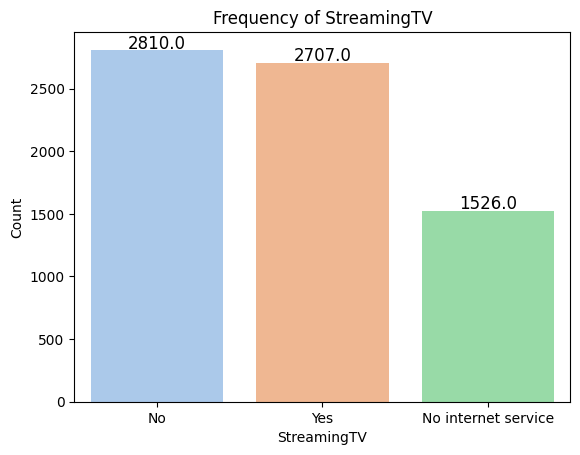

In [ ]:
# Call the function to create a visualization of the StreamingTV feature.
visualize_feature_frequency(df, 'StreamingTV')

**Streaming Movies**

In [ ]:
# Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
df['StreamingMovies']

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [ ]:
# Get the percentage of customers who using their Internet service to stream Movies programing
print(f"The percentage of customers who using their Internet service to stream movies programing is :{round((len(df[df['StreamingMovies']=='Yes'])/len(df))*100,2)}% ")

The percentage of customers who using their Internet service to stream movies programing is :38.79% 


In [ ]:
# Get the percentage of customers who not using their Internet service to stream Movies programing
print(f"The percentage of customers who not using their Internet service to stream movies programing is :{round((len(df[df['StreamingMovies']=='No'])/len(df))*100,2)}% ")

The percentage of customers who not using their Internet service to stream movies programing is :39.54% 


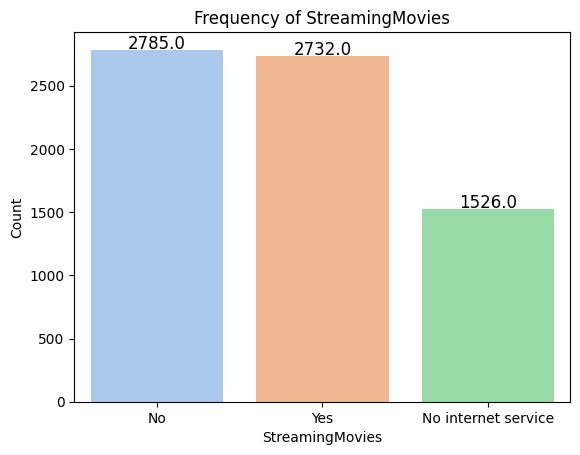

In [ ]:
# Call the function to create a visualization of the StreamingMovies feature.
visualize_feature_frequency(df, 'StreamingMovies')

**Contract**

In [ ]:
# Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
df['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object

In [ ]:
# Get the unique values in Contract column
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

- The contract duration options may include one month, one year, or two years.

In [ ]:
# Get the frequency of each value in Contract column
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
# The percentage of customer who using month-to-month contract
print(f"The percentage of customer who using month-to-month contract is : {round((len(df[df['Contract']=='Month-to-month'])/len(df))*100,2)}%")

The percentage of customer who using month-to-month contract is : 55.02%


In [ ]:
# The percentage of customer who using one year contract
print(f"The percentage of customer who using one year contract is : {round((len(df[df['Contract']=='One year'])/len(df))*100,2)}%")

The percentage of customer who using one year contract is : 20.91%


In [ ]:
# The percentage of customer who using two year contract
print(f"The percentage of customer who using two year contract is : {round((len(df[df['Contract']=='Two year'])/len(df))*100,2)}%")

The percentage of customer who using two year contract is : 24.07%


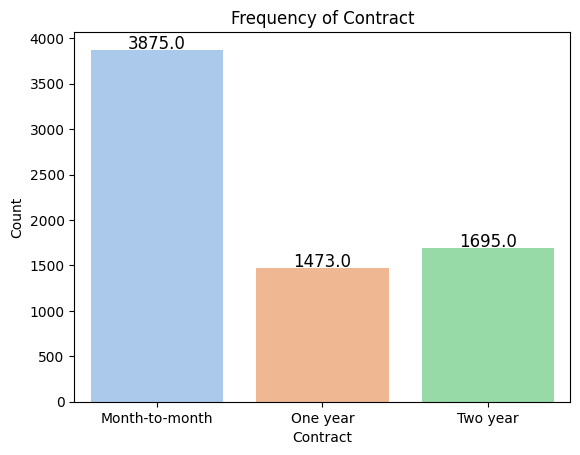

In [ ]:
# Call the function to create a visualization of the Contract feature.
visualize_feature_frequency(df, 'Contract')

- Noteworthy that the most commonly chosen duration by customers is 'one month'.

- Most customers prefer to renew their contracts on a monthly basic .

- I believe a Month-to-month contract is beneficial for new customers who want to test the company, and it's also suitable for customers who cannot afford to pay yearly.

**PaperlessBilling**

In [ ]:
# Indicates if the customer has chosen paperless billing
df['PaperlessBilling']

0       Yes
1        No
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042    Yes
Name: PaperlessBilling, Length: 7043, dtype: object

In [ ]:
# Get the frequency for each value in PaperlessBilling column
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [ ]:
# The percentage of customers who prefer using Paperless (Electronic) Billing
print(f"The percentage of customers who prefer using Paperless (Electronic) Billing is : {round((len(df[df['PaperlessBilling']=='Yes'])/len(df))*100,2)}%")

The percentage of customers who prefer using Paperless (Electronic) Billing is : 59.22%


In [ ]:
# The percentage of customers who prefer using Paper Billing
print(f"The percentage of customers who prefer using Paper Billing is : {round((len(df[df['PaperlessBilling']=='No'])/len(df))*100,2)}%")

The percentage of customers who prefer using Paper Billing is : 40.78%


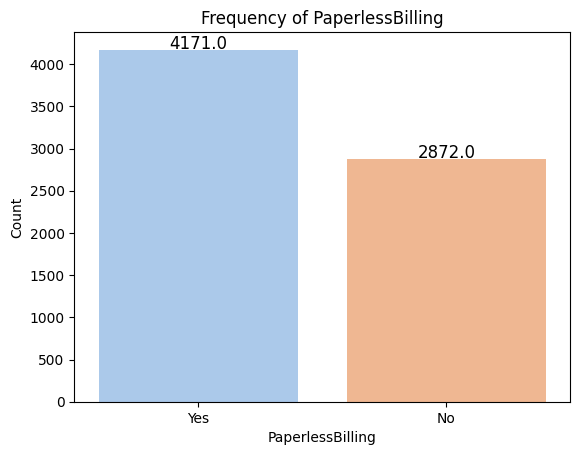

In [ ]:
# Call the function to create a visualization of the PaperlessBilling feature.
visualize_feature_frequency(df, 'PaperlessBilling')

- The most customers prefer using Paperless Billing instead of Paper Billing

**PaymentMethod**

In [ ]:
# Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
df['PaymentMethod']

0                Electronic check
1                    Mailed check
2                    Mailed check
3       Bank transfer (automatic)
4                Electronic check
                  ...            
7038                 Mailed check
7039      Credit card (automatic)
7040             Electronic check
7041                 Mailed check
7042    Bank transfer (automatic)
Name: PaymentMethod, Length: 7043, dtype: object

In [ ]:
# Get all payment methods
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

- There are four types of payment methods: Electronic check, Mailed check, Bank transfer (automatic), and Credit card (automatic).

In [ ]:
# Get the frequency of each payment method
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
# The percentage of customers who prefer using Electronic check method
print(f"The percentage of customers who prefer using Electronic check method  is : {round((len(df[df['PaymentMethod']=='Electronic check'])/len(df))*100,2)}%")

The percentage of customers who prefer using Electronic check method  is : 33.58%


In [ ]:
# The percentage of customers who prefer using Mailed check  method
print(f"The percentage of customers who prefer using Mailed check  method  is : {round((len(df[df['PaymentMethod']=='Mailed check'])/len(df))*100,2)}%")

The percentage of customers who prefer using Mailed check  method  is : 22.89%


In [ ]:
# The percentage of customers who prefer using Bank transfer (automatic) method
print(f"The percentage of customers who prefer using Bank transfer (automatic)  method  is : {round((len(df[df['PaymentMethod']=='Bank transfer (automatic)'])/len(df))*100,2)}%")

The percentage of customers who prefer using Bank transfer (automatic)  method  is : 21.92%


In [ ]:
# The percentage of customers who prefer using Credit card (automatic) method
print(f"The percentage of customers who prefer Credit card (automatic)  method  is : {round((len(df[df['PaymentMethod']=='Credit card (automatic)'])/len(df))*100,2)}%")

The percentage of customers who prefer Credit card (automatic)  method  is : 21.61%


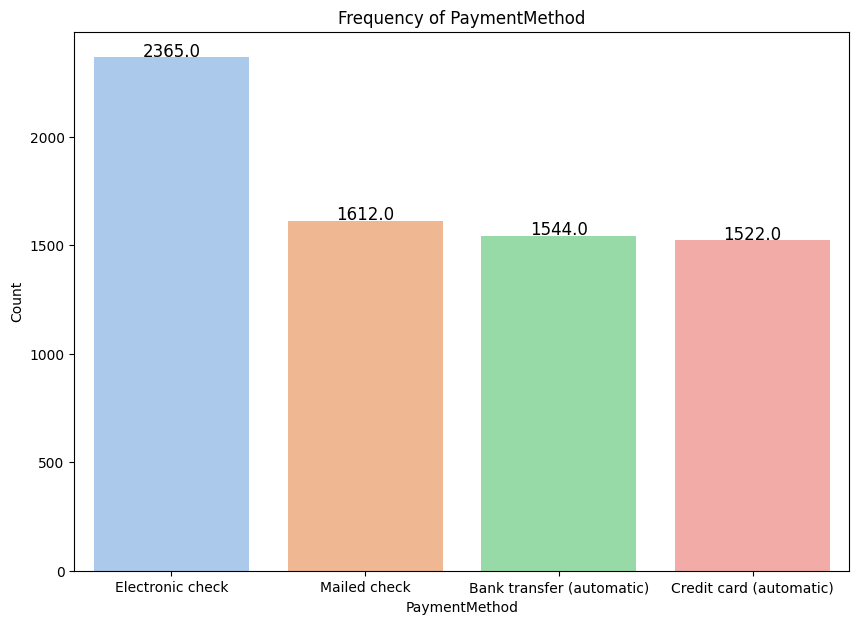

In [ ]:
# Call the function to create a visualization of the PaymentMethod feature.
visualize_feature_frequency(df, 'PaymentMethod',(10, 7))

- The most customers prefer using 'Electronic check' , but other methods also  are used

**MonthlyCharges**

In [ ]:
 # Indicates the customer’s current total monthly charge for all their services from the company.
df['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [ ]:
# Get the customer who have the maximum Monthly Charges and print the maximum Monthly Charges
max=df['MonthlyCharges'].max()
print(f'The number of customers that have the same maximum Monthly Charges  is {len(df[df["MonthlyCharges"]==max])}')
print(f"The maximum Monthly Charges is : {max}")
list(df[df['MonthlyCharges']==max]['customerID'])


The number of customers that have the same maximum Monthly Charges  is 1
The maximum Monthly Charges is : 118.75


['7569-NMZYQ']

In [ ]:
# Get the customer who have the minimum Monthly Charges and print the maximum Monthly Charges
min=df['MonthlyCharges'].min()
print(f'The number of customers that have the same minimum Monthly Charges is {len(df[df["MonthlyCharges"]==min])}')
print(f"The minimum Monthly Charges is : {min}")
list(df[df['MonthlyCharges']==min]['customerID'])

The number of customers that have the same minimum Monthly Charges is 1
The minimum Monthly Charges is : 18.25


['6823-SIDFQ']

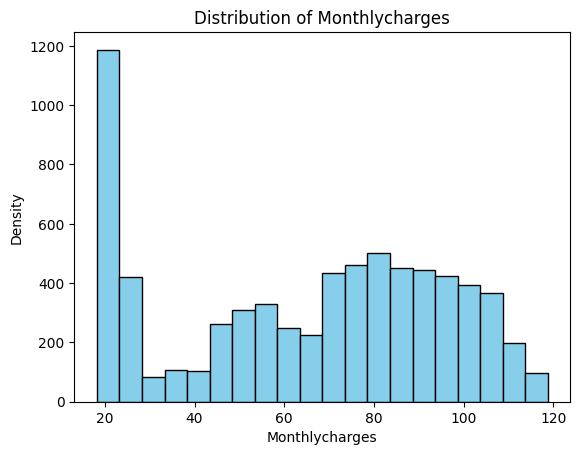

In [ ]:
# Plot the distributions of Monthly Charges
density(df,'MonthlyCharges')

In [ ]:
# Total Charges Indicates the customer’s total charges, calculated to the end of the quarter specified above.
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
# Replace empty strings in 'TotalCharges' with corresponding values in 'MonthlyCharges'
df['TotalCharges'] = df.apply(lambda row: row['MonthlyCharges'] if row['TotalCharges'] == ' ' else row['TotalCharges'], axis=1)

# Now, convert 'TotalCharges' to a numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verify the changes
print(df[df['TotalCharges'].isnull()])


Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [ ]:
# Get the customer who have the maximum Total Charges and print the maximum total Charges
# Convert firstly TotalCharges to float
df['TotalCharges']=df['TotalCharges'].astype('float')
max=df['TotalCharges'].max()
print(f'The number of customers that have the same maximum Total Charges  is {len(df[df["TotalCharges"]==max])}')
print(f"The maximum Total Charges is : {max}")
list(df[df['TotalCharges']==max]['customerID'])


The number of customers that have the same maximum Total Charges  is 1
The maximum Total Charges is : 8684.8


['2889-FPWRM']

In [ ]:
# Get the customer who have the minimum Total Charges and print the minimum total Charges
min=df['TotalCharges'].min()
print(f'The number of customers that have the same minimum Total Charges  is {len(df[df["TotalCharges"]==min])}')
print(f"The minimum Total Charges is : {min}")
list(df[df['TotalCharges']==min]['customerID'])

The number of customers that have the same minimum Total Charges  is 1
The minimum Total Charges is : 18.8


['2967-MXRAV']

In [ ]:
df['TotalCharges'].dtype

dtype('float64')

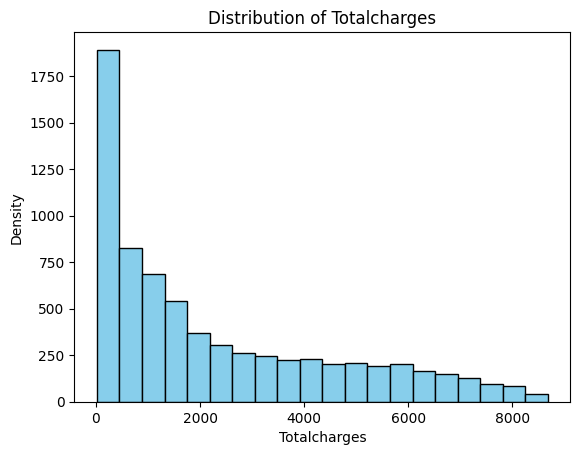

In [ ]:
# Plot the distributions of Monthly Charges
density(df,'TotalCharges')

**Churn**

In [ ]:
# Indicate wheather the customer left the company this quarter or remains.
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [ ]:
# Get the unique values in "Churn" column
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Get the percentage of customers who leaving the company
print(f"The percentage of customers who leaving the company  is : {round((len(df[df['Churn']=='Yes'])/len(df))*100,2)}%")

The percentage of customers who leaving the company  is : 26.54%


In [ ]:
# Get the percentage of customers who not leaving the company
print(f"The percentage of customers who not leaving the company  is : {round((len(df[df['Churn']=='No'])/len(df))*100,2)}%")

The percentage of customers who not leaving the company  is : 73.46%


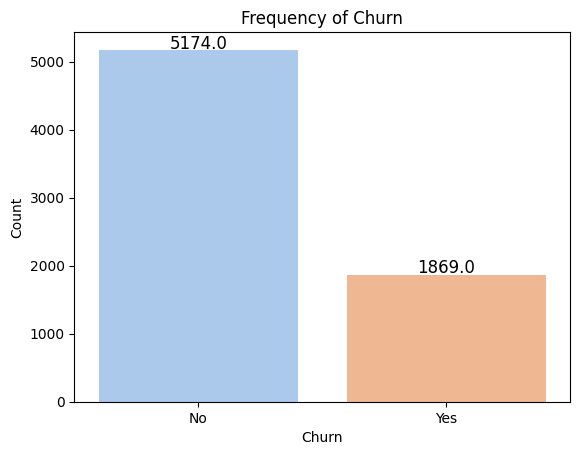

In [ ]:
# Call the function to create a visualization of the Churn feature.
visualize_feature_frequency(df, 'Churn')

- Approximately 27% of users have left the company.
- We will try to discover why these customers left the company.

**Gender with Churn**

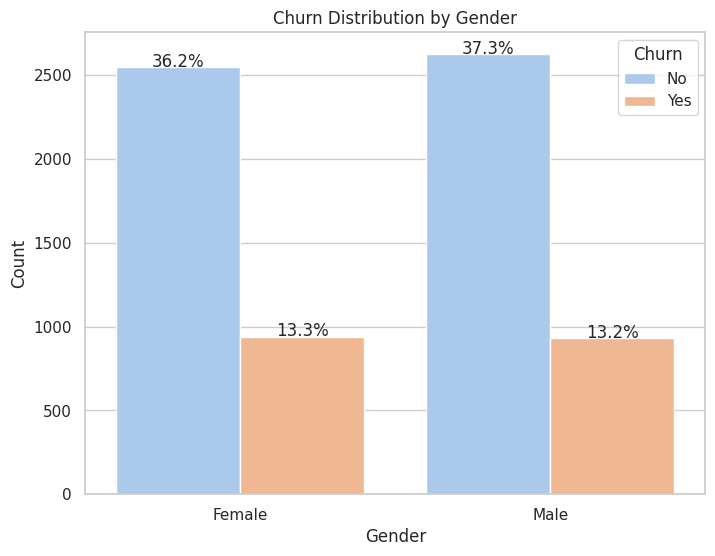

In [ ]:
# Plot gender with Churn to knows the most customers who left the company are male or female
plot_churn_distribution(df, 'gender')

- Approximately the same number of males and females left the company, indicating that we can't rely on 'gender' alone to understand why customers left.

**SeniorCitizen with Churn**

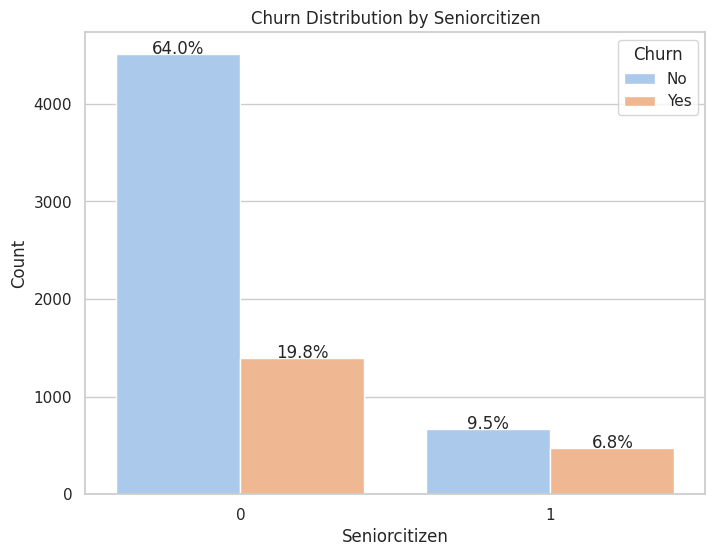

In [ ]:
# Plot SeniorCitizen with Churn to knows the most customers who left the company their age above or less than 65 year
plot_churn_distribution(df, 'SeniorCitizen')

The most customer who left the company their age less than 60 around 20% , and it's logicall because of the most customers their age less than 60

**Partner with Churn**

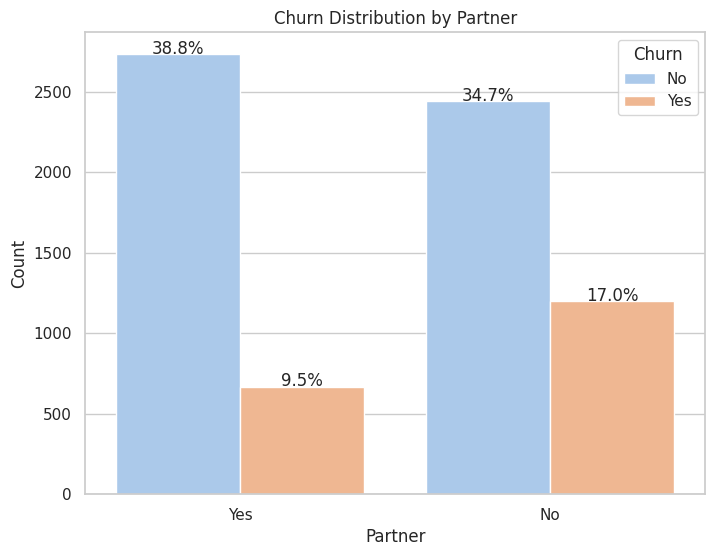

In [ ]:
# Plot Partner with Churn to knows the most customers who left the company have partner or not
plot_churn_distribution(df, 'Partner')

- We found that 17% of customers who do not have partners left the company, out of the total 26% of customers who left

- Only 9.5% of people who have partner left the company

- This suggests that having a partner may contribute to greater customer stability within the company.

**Dependents with Churn**

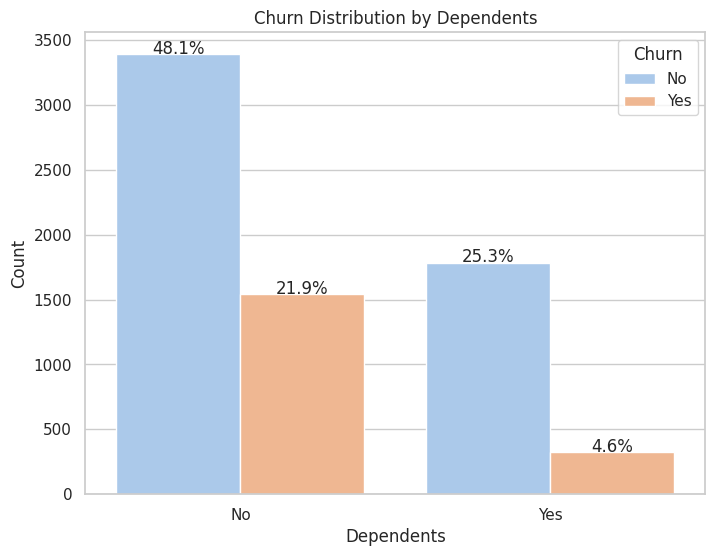

In [ ]:
# Plot Dependents with Churn to knows the most customers who left the company have Dependents or not
plot_churn_distribution(df, 'Dependents')

- We found that 22% of customers who do not have dependents left the company, out of the total 26% of customers who left

- Only 4.6% of people who have dependents left the company

- This suggests that having dependents may contribute to greater customer stability within the company, as their dependents may need to use home and internet services.

**Tenure**

In [ ]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

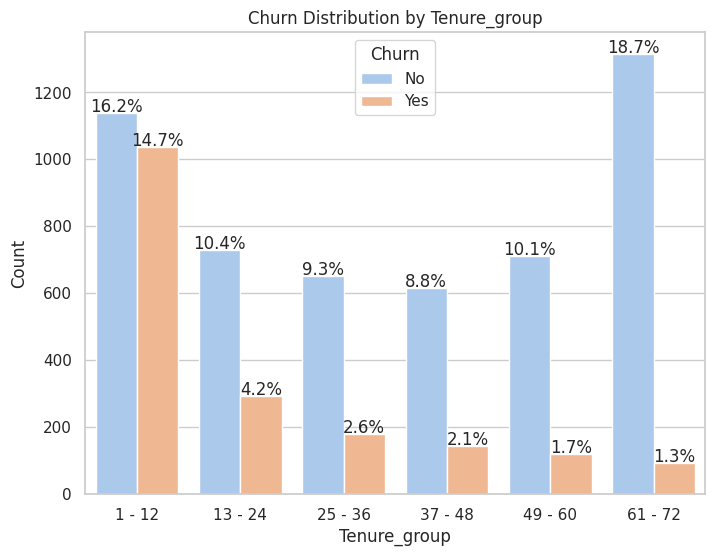

In [ ]:
# Plot tenure_group with Churn to knows the most customers who left the company have belong to each group
plot_churn_distribution(df, 'tenure_group')

- The first group is the one that contains the most customers who left the company

**All services with Churn**

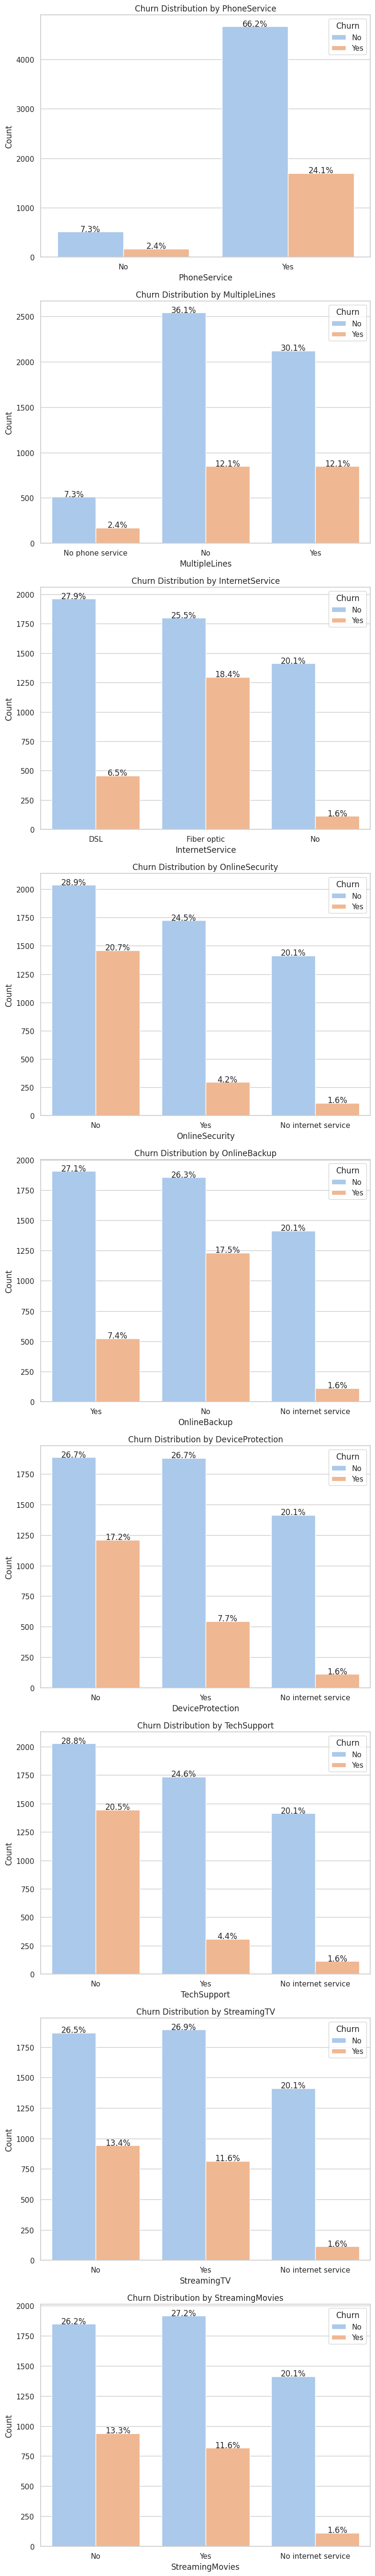

In [ ]:
# List of services
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set the style of the visualization
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=len(services), ncols=1, figsize=(8, 6 * len(services)))

# Iterate over services and create count plots
for i, service in enumerate(services):
    ax = sns.countplot(x=service, hue='Churn', data=df, palette='pastel', ax=axes[i])

    # Add percentages on top of each bar
    total = len(df[service])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                f'{height/total:.1%}',
                ha="center")

    # Add labels and title
    ax.set_xlabel(service)
    ax.set_ylabel('Count')
    ax.set_title(f'Churn Distribution by {service}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


**Insights From previous plot on all services**


- The company should review its phone services as 24% of users who utilize these services have left. There may be issues with this service that need attention , only 2% of users who do not use phone services have left the company.

- The company should investigate its internet services, especially for customers using 'Fiber optic', as 18.4% of users with this service left the company out of the total 26% who left

- The company should emphasize the importance of security services to customers, as we've observed that 21% of customers who do not use security services left the company, constituting a significant portion of the total 26% of customers who left.

- The company should emphasize the importance of online backup services to customers, as we've observed that 17.5% of customers who do not use online backup services left the company, constituting a significant portion of the total 26% of customers who left.

- The company should emphasize the importance of device protection services to customers, as we've observed that 17.2% of customers who do not use device protection services left the company, constituting a significant portion of the total 26% of customers who left.

-  The company should emphasize the importance of tech support services to customers, as we've observed that 20.5% of customers who do not use tech support services left the company, constituting a significant portion of the total 26% of customers who left.

- In summary, the company should underscore the significance of its services. These services not only protect users' devices but also provide a robust security system, backup services, and technical support to address customer issues. By ensuring user safety, the company can encourage customer retention and minimize the likelihood of users leaving the company.

**Contract with Churn**

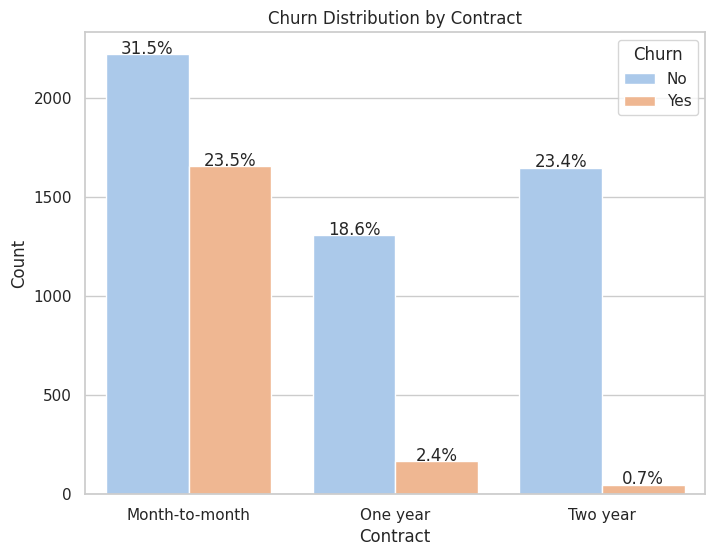

In [ ]:
# Plot Contract with Churn to knows the most customers who left the company because of contract
plot_churn_distribution(df, 'Contract')

- The company should take note that there may be an issue with the 'Month-to-month' contract, as 24.5% out of the total 26% of users who left the company were on this type of contract.

- Perhaps the problem lies in the contract structure. The company should conduct a thorough review to identify and address any issues. For new customers, testing the company and its services is crucial. Therefore, the company should focus on improving existing services and introducing more attractive offerings to enhance customer satisfaction, ultimately reducing the likelihood of customers leaving the company

**PaperlessBilling with Churn**

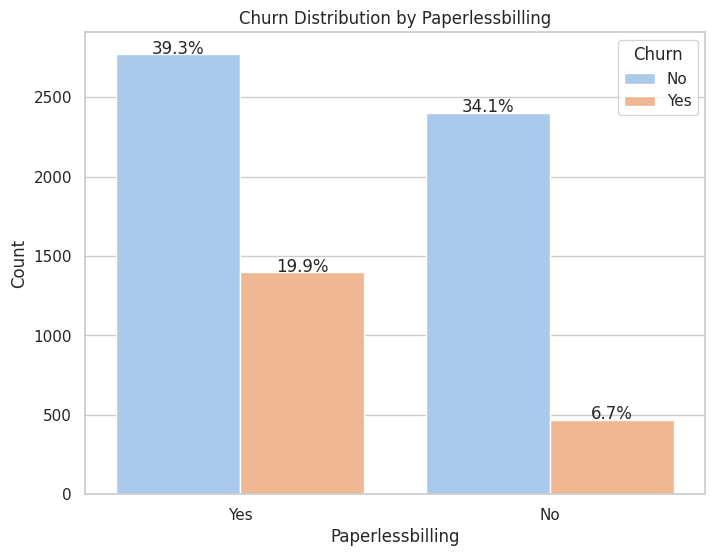

In [ ]:
# Plot PaperlessBilling with Churn to knows the most customers who left the company because of Billing
plot_churn_distribution(df, 'PaperlessBilling')

- The company should take note that 20% of customers who utilize electronic billing have left, constituting a portion of the total 26% who left the company.

**PaymentMethod with Churn**

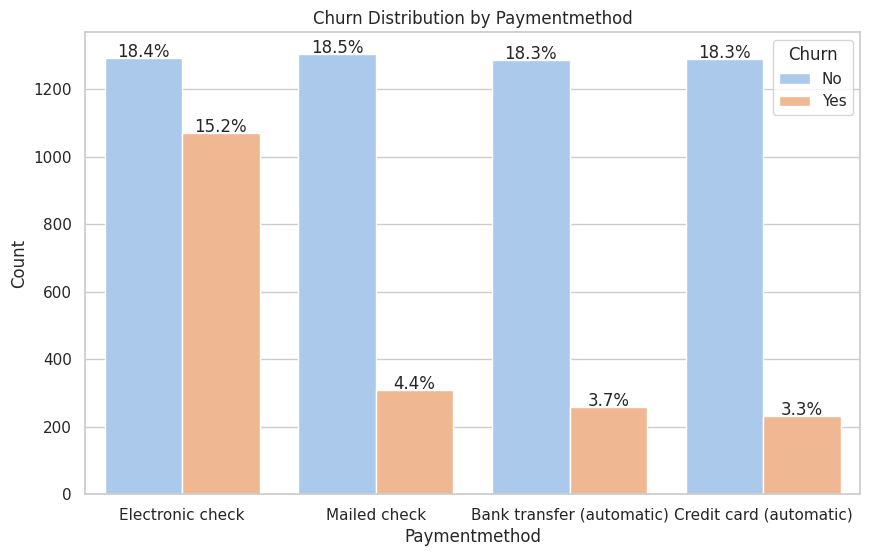

In [ ]:
# Plot PaymentMethod with Churn to knows the most customers who left the company because of Payment Methods
plot_churn_distribution(df, 'PaymentMethod','Churn',(10,6))

- The company should investigate the 'Electronic check' payment method, as half of the users who utilize this method have left the company. It suggests that the 'Electronic check' method may not be suitable for all customers with electronic billing ,report to all customers who are experiencing issues with the 'Electronic Check' method that there are alternative methods available for their use.

**MonthlyCharges and TotalCharges**

<Figure size 1000x600 with 0 Axes>

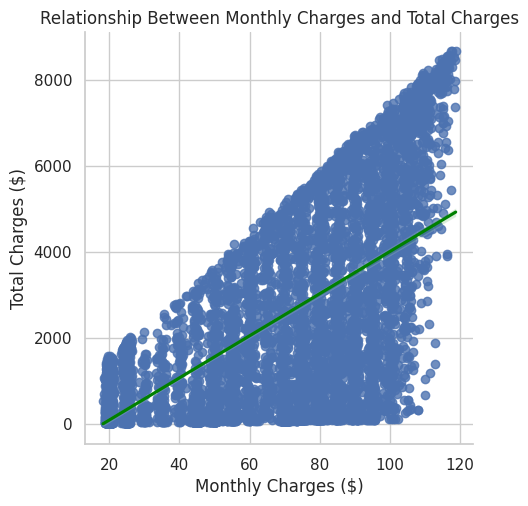

In [ ]:
# Get the relation between MonthlyCharges and TotalCharges
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a scatter plot with a linear regression line
plt.figure(figsize=(10, 6))
lm_plot = sns.lmplot(data=df, x='MonthlyCharges', y='TotalCharges', fit_reg=True,line_kws={'color': 'green'})

# Add labels and title
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Total Charges ($)')
plt.title('Relationship Between Monthly Charges and Total Charges')

# Show the plot
plt.show()

In [ ]:
df['MonthlyCharges'].corr(df['TotalCharges'])

0.6511819850393793

- There is moderate positive relationship(correlation) between MonthlyCharges and TotalCharges

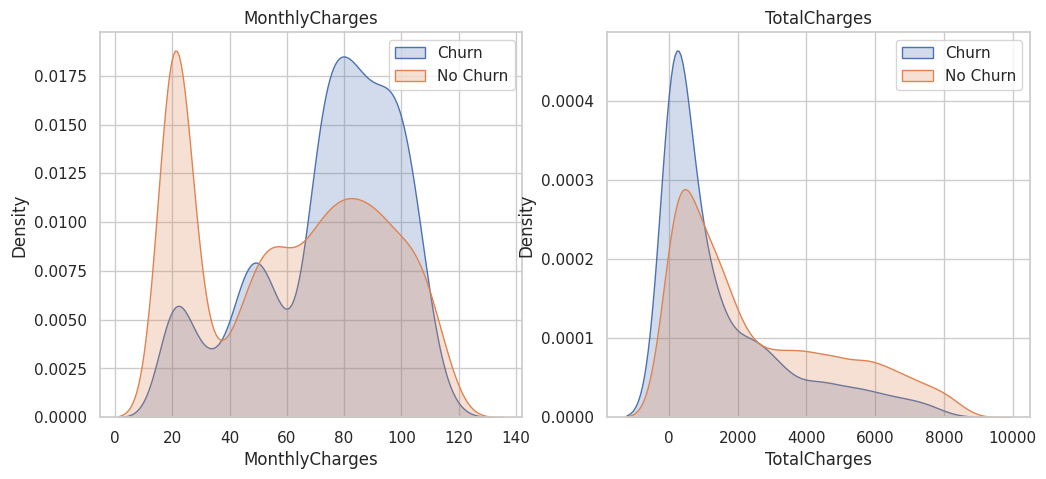

In [ ]:
# Plot the density of MonthlyCharges and TotalCharges
customer_account_num = ["MonthlyCharges","TotalCharges"]
histogram_plots(df,customer_account_num, "Churn")

- MonthlyCharges :  high churn rate when customer paid high monthly charges

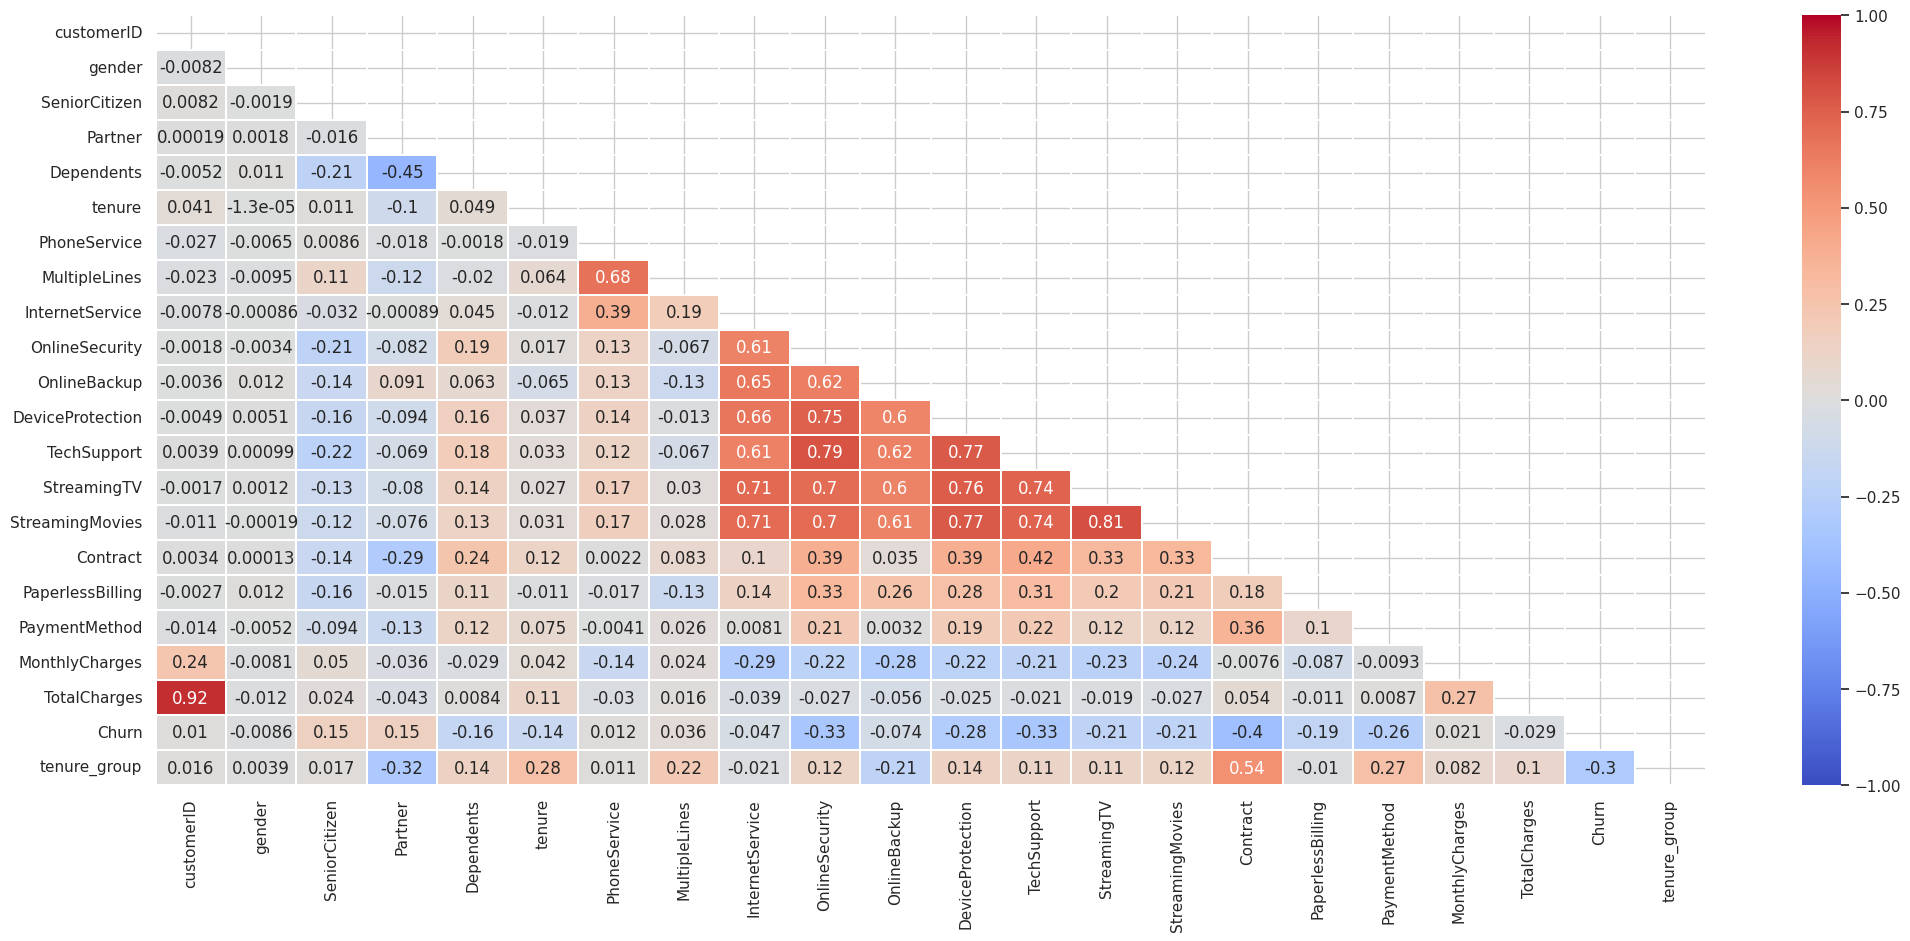

In [ ]:
# Get the correlation between all features and target
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# **Data Preprocessing**

In [ ]:
# First , print a head of data
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [ ]:
# Check null values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
tenure_group        11
dtype: int64

In [ ]:
# Drop tenure_group column
df.drop('tenure_group',axis=1,inplace=True)

In [ ]:
# Drop the customerID column because not important
df.drop('customerID', axis=1, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# Check columns
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Check Duplication
df.duplicated().sum()

22

In [ ]:
# Drop Duplication
df=df.drop_duplicates()

In [ ]:
# Check Duplication again
df.duplicated().sum()

0

In [ ]:
# Convert values of "No internet service" into "No"
target_columns=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in target_columns:
  df[i].replace('No internet service', 'No', inplace=True)


<ipython-input-153-b8406d0fe43a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].replace('No internet service', 'No', inplace=True)


In [ ]:
# convert value of 'No phone service" into 'No' in MultipleLines column
df['MultipleLines'].replace('No phone service','No',inplace=True)

<ipython-input-154-4c5cf608768a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MultipleLines'].replace('No phone service','No',inplace=True)


In [ ]:
# convert values in target_columns columns from categorical into integer
dic={"No":0,"Yes":1}
target_columns_2=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Partner', 'Dependents', 'PhoneService','PaperlessBilling','Churn','MultipleLines']
for i in target_columns_2:
  df[i].replace(dic, inplace=True)

<ipython-input-155-21a979e0af72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].replace(dic, inplace=True)


In [ ]:
# Check unique values in each column in target_columns_2
for i in target_columns_2:
  print(f"The unique value in {i} is : {df[i].unique()}")

The unique value in OnlineSecurity is : [0 1]
The unique value in OnlineBackup is : [1 0]
The unique value in DeviceProtection is : [0 1]
The unique value in TechSupport is : [0 1]
The unique value in StreamingTV is : [0 1]
The unique value in StreamingMovies is : [0 1]
The unique value in Partner is : [1 0]
The unique value in Dependents is : [0 1]
The unique value in PhoneService is : [0 1]
The unique value in PaperlessBilling is : [1 0]
The unique value in Churn is : [0 1]
The unique value in MultipleLines is : [0 1]


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [ ]:
# Get categorical data
df.select_dtypes('object').columns

Index(['gender', 'InternetService', 'Contract', 'PaymentMethod'], dtype='object')

In [ ]:
# Get numerical data
df.select_dtypes(['int','float']).columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Convert values of gender from (Male-Female) into (1-0)
df['gender'].replace({'Male':1,'Female':0},inplace=True)

<ipython-input-160-1ebec1ec167e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'].replace({'Male':1,'Female':0},inplace=True)


In [ ]:
# Check unique values in gender column
df['gender'].unique()

array([0, 1])

In [ ]:
# Make one-hot-encoding on 'InternetService', 'Contract', 'PaymentMethod'

df=pd.get_dummies(data=df,columns=['InternetService', 'Contract', 'PaymentMethod'])

In [ ]:
# Check categorical data again
df.select_dtypes('object').columns

Index([], dtype='object')

- Currently, there is no categorical data.

In [ ]:
# Check numerical data again
df.select_dtypes(['int','float']).columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Check the data types using "dtypes" function
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
# Print the random sample from data
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3692,0,0,1,1,3,1,1,0,1,1,...,1,0,0,1,0,0,1,0,0,0
2361,0,0,0,1,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2423,0,0,0,0,18,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3074,0,0,1,1,35,1,1,1,1,0,...,1,0,0,1,0,0,0,1,0,0
6387,0,0,1,0,35,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
# There are columns i need to scale them such as [tenure - MonthlyCharges - TotalCharges]
# Make min-max scaler on these columns
scaling_columns=['tenure' , 'MonthlyCharges' , 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[scaling_columns]=scaler.fit_transform(df[scaling_columns])

In [ ]:
# Check values of three columns
df[['tenure' , 'MonthlyCharges' , 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330
...,...,...,...
7038,0.333333,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.152778,0.112935,0.037809
7041,0.055556,0.558706,0.033210


In [ ]:
# Get the min and max value in each column in three columns
min_max_values=['tenure','MonthlyCharges','TotalCharges']
for i in min_max_values:
  print(f"The maximum and the minimum values in {i} column are Max: {df[i].max()} , Min:{df[i].min()}")

The maximum and the minimum values in tenure column are Max: 1.0 , Min:0.0
The maximum and the minimum values in MonthlyCharges column are Max: 0.9999999999999999 , Min:0.0
The maximum and the minimum values in TotalCharges column are Max: 0.9999999999999999 , Min:0.0


In [ ]:
# Split the data into "X" and "Y"
x=df.drop('Churn',axis=1)
y=df['Churn']

In [ ]:
# Get the shape of 'X'
x.shape

(7021, 26)

In [ ]:
# Get the shape of "Y"
y.shape

(7021,)

In [ ]:
# Split 'X','Y' into x_train , y_train,x_test,y_test
x_train ,x_test, y_train , Y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
# Get shape of x_train
print(f"The shape of x_train is : {x_train.shape}")

The shape of x_train is : (5616, 26)


In [ ]:
# Get the number of records in x_train
print(f"The number of samples in x_train is : {x_train.shape[0]} samples")

The number of samples in x_train is : 5616 samples


In [ ]:
# Get the number of features in x_train
print(f"The number of features in x_train is : {x_train.shape[1]} features")

The number of features in x_train is : 26 features


In [ ]:
# Get shape of y_train
print(f"The shape of y_train is : {y_train.shape}")

The shape of y_train is : (5616,)


In [ ]:
# Get the number of records in y_train
print(f"The number of samples in y_train is : {y_train.shape[0]} samples")

The number of samples in y_train is : 5616 samples


In [ ]:
# Get shape of x_test
print(f"The shape of x_test is : {x_test.shape}")

The shape of x_test is : (1405, 26)


In [ ]:
# Get the number of records in x_test
print(f"The number of samples in x_test is : {x_test.shape[0]} samples")

The number of samples in x_test is : 1405 samples


In [ ]:
# Get the number of features in x_test
print(f"The number of samples in x_test is : {x_test.shape[1]} samples")

The number of samples in x_test is : 26 samples


In [ ]:
# Get shape of y_test
print(f"The shape of Y_test is : {Y_test.shape}")

The shape of Y_test is : (1405,)


In [ ]:
# Get the number of records in Y_test
print(f"The number of samples in Y_test is : {Y_test.shape[0]} samples")

The number of samples in Y_test is : 1405 samples


# **Building Deep and Machine Learning Models**





# **Deep Learning Models**

In [ ]:
# Building the model
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5249 - accuracy: 0.7135
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.7938
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.7968
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.7991
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8048
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8025
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8054
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8072
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8063
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4095 - accura

In [ ]:
# Evaluate the model
model.evaluate(x_test,Y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.7765


[0.5755705833435059, 0.7765124440193176]

- The model generalized well on unseen data

In [ ]:
# Get the prediction of model
prediction=model.predict(x_test)

44/44 [==============================] - 0s 1ms/step


In [ ]:
# Determine the threshold = 0.5 and get the output prediction
Binary_prediction=[] # Create list to append the result
for i in prediction:
    if i>0.5:
        Binary_prediction.append(1)
    else:
        Binary_prediction.append(0)

In [ ]:
# Print binary_prediction
print(Binary_prediction)

[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 

In [ ]:
# Show the confusion matrix
print(classification_report(Y_test,Binary_prediction))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1029
           1       0.58      0.63      0.60       376

    accuracy                           0.78      1405
   macro avg       0.72      0.73      0.72      1405
weighted avg       0.78      0.78      0.78      1405



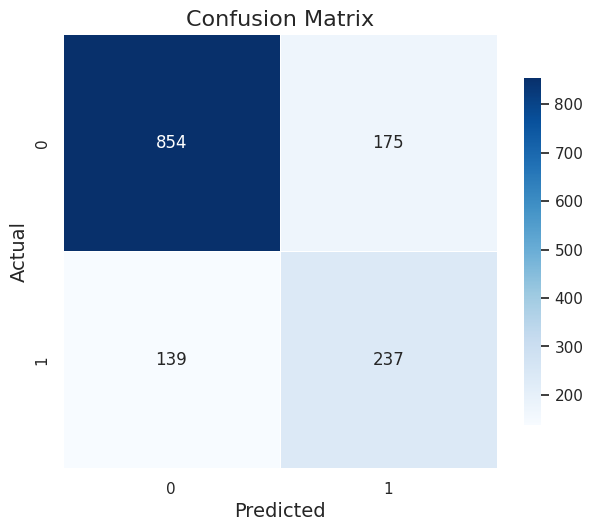

In [ ]:
# Assuming binary_prediction and Y_test are already defined
cm = tf.math.confusion_matrix(labels=Y_test, predictions=Binary_prediction)
# Set a color palette
sns.set_palette("Blues")
# Plotting the heatmap with labels and a diverging color map
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", linewidths=.5, square=True, cbar_kws={"shrink": 0.75})
# Customizing labels
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
# Show the plot
plt.show()

- The model successfully predicted that 237 out of the 376 users who left the company.

- The model successfully predicted that 854 out of the 1029 users did not leave the company.

In [ ]:
# Extract values for TP, FP, TN, FN
TP = cm[1, 1]  # True Positive
FP = cm[0, 1]  # False Positive
TN = cm[0, 0]  # True Negative
FN = cm[1, 0]  # False Negative

# Print the values
print("True Positive:", TP)
print("False Positive:", FP)
print("True Negative:", TN)
print("False Negative:", FN)

True Positive: tf.Tensor(237, shape=(), dtype=int32)
False Positive: tf.Tensor(175, shape=(), dtype=int32)
True Negative: tf.Tensor(854, shape=(), dtype=int32)
False Negative: tf.Tensor(139, shape=(), dtype=int32)


In [ ]:
# Access the value
true_positive =TP.numpy()
false_positive =FP.numpy()
true_negative  =TN.numpy()
false_negative = FN.numpy()

In [ ]:
print(f"True positive value is : {true_positive}")
print(f"False positive value is : {false_positive}")
print(f"True negative value is : {true_negative}")
print(f"False negative value is : {false_negative}")


True positive value is : 237
False positive value is : 175
True negative value is : 854
False negative value is : 139


In [ ]:
# Calculate accuracy , recall , precision , f1-score
Accuracy=(true_positive+true_negative)/(true_positive+false_positive+true_negative+false_negative)
Precision=(true_positive)/(true_positive+false_positive)
Recall=(true_positive)/(true_positive+false_negative)
F1_score=2*((Precision*Recall)/(Precision+Recall))

In [ ]:
print(f"The accuracy on test data is : {round(Accuracy,2)}")
print(f"The Precision on test data is : {round(Precision,2)}")
print(f"The Recall on test data is : {round(Recall,2)}")
print(f"The F1_score on test data is : {round(F1_score,2)}")

The accuracy on test data is : 0.78
The Precision on test data is : 0.58
The Recall on test data is : 0.63
The F1_score on test data is : 0.6


From the 'Churn' column, we can notice that there is an imbalance in classes.
I will solve this problem and run the model again to improve the metrics on minority class

**Functions for solving imbalance in classes(Oversampling-Undersampling-Ensample-SMOTE)**

In [ ]:
# Build the function to build the sequential model model , evalute model , predict model and print classification report and confusion matrix
def build_and_evaluate_model(x, y,technique,epochs=100):
    # Split x, y into x_train, x_test, y_train, y_test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

    # Build the model
    model = keras.Sequential([
        keras.layers.Dense(26, input_shape=(26,), activation='relu'),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Fit the model
    model.fit(x_train, y_train, epochs=epochs)

    # Evaluate the model
    model.evaluate(x_test, y_test)

    # Get the predictions
    predictions = model.predict(x_test)
    binary_predictions = np.round(predictions)
    # print(binary_predictions)

    # Print the first classification report with a border
    print("#" * 40)
    print("#" * 5 + f" Classification Report 1 Before {technique} " + "#" * 5)
    print("#" * 40)
    print(classification_report(Y_test, Binary_prediction))
    print("#" * 40)

    # Print the first classification report with a border
    print("#" * 40)
    print("#" * 5 + f" Classification Report 2 After {technique} " + "#" * 5)
    print("#" * 40)
    print(classification_report(y_test, binary_predictions))
    print("#" * 40)


    # Build the confusion Matrix
    cm = tf.math.confusion_matrix(labels=y_test, predictions=binary_predictions)
    # Set a color palette
    sns.set_palette("Blues")
    # Plotting the heatmap with labels and a diverging color map
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", linewidths=.5, square=True, cbar_kws={"shrink": 0.75})
    # Customizing labels
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    # Show the plot
    plt.show()

    return model, x_test, y_test, binary_predictions


In [ ]:
# Building ensample function to build the sequential model model , evalute model , predict model and print classification report and confusion matrix
def build_and_evaluate_model(x_train, y_train,technique,epochs=100):
    # Build the model
    model = keras.Sequential([
        keras.layers.Dense(26, input_shape=(26,), activation='relu'),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Fit the model
    model.fit(x_train, y_train, epochs=epochs)

    # Evaluate the model
    model.evaluate(x_test, Y_test)

    # Get the predictions
    predictions = model.predict(x_test)
    binary_predictions = np.round(predictions)
    # print(binary_predictions)

    # Print the first classification report with a border
    print("#" * 40)
    print("#" * 5 + f" Classification Report 1 Before {technique} " + "#" * 5)
    print("#" * 40)
    print(classification_report(Y_test, Binary_prediction))
    print("#" * 40)

    # Print the first classification report with a border
    print("#" * 40)
    print("#" * 5 + f" Classification Report 2 After {technique} " + "#" * 5)
    print("#" * 40)
    print(classification_report(Y_test, binary_predictions))
    print("#" * 40)


    # Build the confusion Matrix
    cm = tf.math.confusion_matrix(labels=Y_test, predictions=binary_predictions)
    # Set a color palette
    sns.set_palette("Blues")
    # Plotting the heatmap with labels and a diverging color map
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", linewidths=.5, square=True, cbar_kws={"shrink": 0.75})
    # Customizing labels
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    # Show the plot
    plt.show()
    return model, x_test, Y_test, binary_predictions

# **Undersampling Strategie for Solving Imbalance Issue**

In [ ]:
# Detrmine Majority and Minority class
if len(df[df['Churn']==0])<len(df[df['Churn']==1]):

  print(f"The minority class is : {df[df['Churn']==0]['Churn'].unique()[0]} class")
  print(f"The Majority class is : {df[df['Churn']==1]['Churn'].unique()[0]} class")

else:
  print(f"The minority class is : {df[df['Churn']==1]['Churn'].unique()[0]} class")
  print(f"The Majority class is : {df[df['Churn']==0]['Churn'].unique()[0]} class")

The minority class is : 1 class
The Majority class is : 0 class


In [ ]:
# Create two data frame for each class
minority_class=df[df['Churn']==1]
majority_class=df[df['Churn']==0]

In [ ]:
# Minority class
minority_class['Churn']

2       1
4       1
5       1
8       1
13      1
       ..
7021    1
7026    1
7032    1
7034    1
7041    1
Name: Churn, Length: 1857, dtype: int64

In [ ]:
# Majority class
majority_class['Churn']

0       0
1       0
3       0
6       0
7       0
       ..
7037    0
7038    0
7039    0
7040    0
7042    0
Name: Churn, Length: 5164, dtype: int64

In [ ]:
# Get the shape of Minority class
minority_class.shape

(1857, 27)

In [ ]:
# Get the shape of Majority class
majority_class.shape

(5164, 27)

In [ ]:
# count class
count_class_0, count_class_1 = df.Churn.value_counts()

In [ ]:
# Count of majority class
count_class_0

5164

In [ ]:
# Count of minority class
count_class_1

1857

In [ ]:
# create new dataframe that make undersampling from majority class
balance_class0=majority_class.sample(count_class_1) # samples in majority class equal samples in minority class

In [ ]:
# Get the length of class 0 after undersampling
len(balance_class0) # The classes  become balanced

1857

In [ ]:
# Concat two dataframe vertically
balance_data_undersampling=pd.concat([balance_class0,minority_class],axis=0)

In [ ]:
# check imbalance in new 'balance_data_undersampling' dataframe
print(f"The length of 0 class : {len(balance_data_undersampling[balance_data_undersampling['Churn']==0])}")
print(f"The length of 1 class : {len(balance_data_undersampling[balance_data_undersampling['Churn']==1])}")


The length of 0 class : 1857
The length of 1 class : 1857


- Now, the classes are balanced.

In [ ]:
# Split the data into 'x' and 'y'
x_1= balance_data_undersampling.drop('Churn',axis=1)
y_1 = balance_data_undersampling['Churn']

In [ ]:
x.shape

(7021, 26)

In [ ]:
y.shape

(7021,)

In [ ]:
x_1.shape

(3714, 26)

In [ ]:
y_1.shape

(3714,)

Epoch 1/100
117/117 [==============================] - 1s 2ms/step - loss: 0.6171 - accuracy: 0.6702
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 0.5094 - accuracy: 0.7515
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7601
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7658
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.7620
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7701
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7717
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7730
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7719
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - loss: 0.4725 - accura

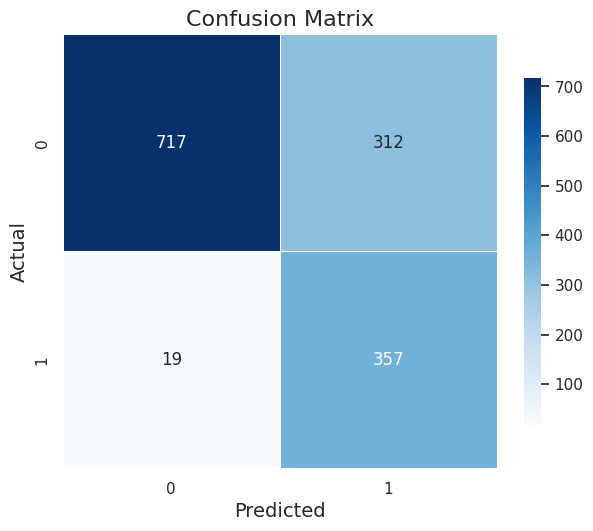

In [ ]:
# Call the function
model_1, x_test_1, y_test_1, binary_prediction_1 = build_and_evaluate_model(x_1, y_1,"Undersampling", epochs=100)

- We can observe improvements in recall, and F1-score for class 1.

- The overall accuracy has not improved.

- Therefore, undersampling has succeeded in improving model performance in class 1.

# **Oversampling Strategie for Solving Imbalance Issue**

In [ ]:
# Count of majority class
count_class_0

5164

In [ ]:
# Count of minority class
count_class_1

1857

In [ ]:
# create new dataframe that make undersampling from minority class
balance_class1=minority_class.sample(count_class_0,replace=True) # samples in majority class equal samples in minority class

In [ ]:
# Get length of class 1
len(balance_class1)

5164

In [ ]:
# Concat two dataframe vertically
balance_data_oversampling=pd.concat([balance_class1,majority_class],axis=0)

In [ ]:
# Check imbalance in new 'balance_data_oversampling' dataframe
print(f"The length of 0 class : {len(balance_data_oversampling[balance_data_oversampling['Churn']==0])}")
print(f"The length of 1 class : {len(balance_data_oversampling[balance_data_oversampling['Churn']==1])}")


The length of 0 class : 5164
The length of 1 class : 5164


In [ ]:
# Split the data into 'x' and 'y'
x_2= balance_data_oversampling.drop('Churn',axis=1)
y_2 = balance_data_oversampling['Churn']

Epoch 1/100
323/323 [==============================] - 2s 3ms/step - loss: 0.5390 - accuracy: 0.7295
Epoch 2/100
323/323 [==============================] - 1s 3ms/step - loss: 0.4908 - accuracy: 0.7619
Epoch 3/100
323/323 [==============================] - 1s 3ms/step - loss: 0.4830 - accuracy: 0.7646
Epoch 4/100
323/323 [==============================] - 1s 3ms/step - loss: 0.4775 - accuracy: 0.7696
Epoch 5/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4729 - accuracy: 0.7674
Epoch 6/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4701 - accuracy: 0.7713
Epoch 7/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4656 - accuracy: 0.7728
Epoch 8/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4610 - accuracy: 0.7759
Epoch 9/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4577 - accuracy: 0.7760
Epoch 10/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4539 - accura

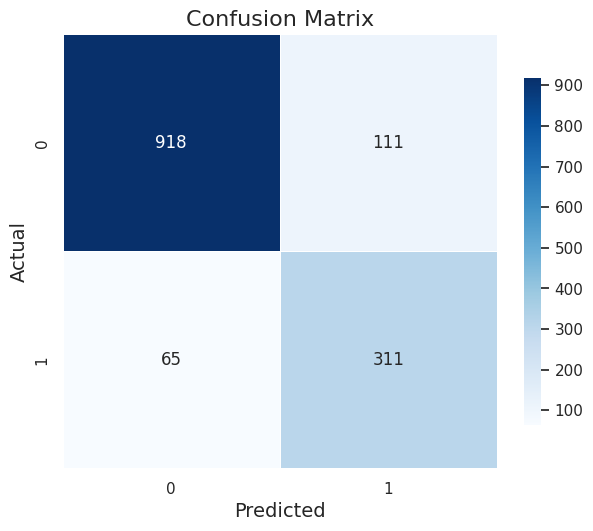

In [ ]:
# Call the function with your data
model_2, x_test_2, y_test_2, binary_prediction_2 = build_and_evaluate_model(x_2, y_2,"Oversampling", epochs=100)

- We can observe improvements in precision, recall, and F1-score for class 1 after oversampling.

- The overall accuracy has improved.

- Therefore, oversampling has succeeded in improving model performance.



# **SMOTE technique for Solving Imbalance Issue**

The SMOTE technique uses a KNN model to create new synthetic samples, and the main steps are as follows:

- Choose the data points that belong to the minority class.

- Determine the k-nearest neighbors for each data point.

- Create synthetic data points between each data point and its neighbors.

![image](https://editor.analyticsvidhya.com/uploads/77417image1.png)

In [ ]:
# Start with split the data into x and y
x_sm = df.drop('Churn',axis='columns')
y_sm = df['Churn']

In [ ]:
# Check the length of each class in the data before applying the SMOTE technique.
print(f" The length each class before applying SMOTE is :\n{y_sm.value_counts()}")

 The length each class before applying SMOTE is :
0    5164
1    1857
Name: Churn, dtype: int64


In [ ]:
# Applay SMOTE technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x_sm, y_sm)

In [ ]:
# Check the length of each class in the data after applying the SMOTE technique.
print(f" The length each class after applying SMOTE is :\n{y_sm.value_counts()}")

 The length each class after applying SMOTE is :
0    5164
1    5164
Name: Churn, dtype: int64


Epoch 1/100
323/323 [==============================] - 2s 2ms/step - loss: 0.5070 - accuracy: 0.7550
Epoch 2/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4558 - accuracy: 0.7870
Epoch 3/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4483 - accuracy: 0.7856
Epoch 4/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4413 - accuracy: 0.7925
Epoch 5/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4350 - accuracy: 0.7950
Epoch 6/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4310 - accuracy: 0.7958
Epoch 7/100
323/323 [==============================] - 1s 3ms/step - loss: 0.4243 - accuracy: 0.8036
Epoch 8/100
323/323 [==============================] - 1s 3ms/step - loss: 0.4213 - accuracy: 0.8034
Epoch 9/100
323/323 [==============================] - 1s 3ms/step - loss: 0.4166 - accuracy: 0.8062
Epoch 10/100
323/323 [==============================] - 1s 2ms/step - loss: 0.4135 - accura

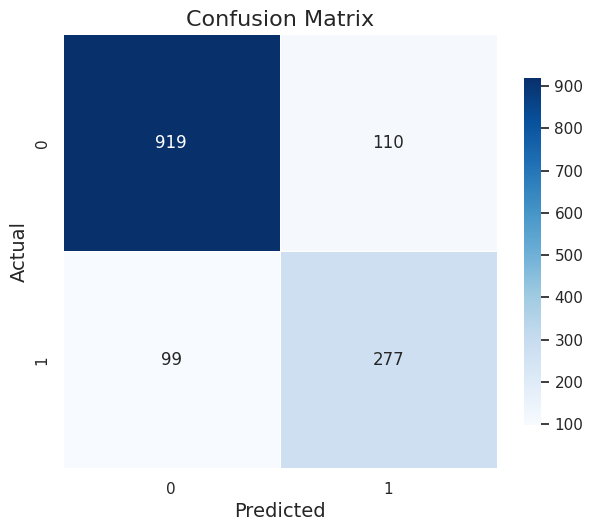

In [ ]:
# Call the function
model_sm, x_test_sm, y_test_sm, binary_prediction_sm = build_and_evaluate_model(x_sm, y_sm,"Oversampling", epochs=100)

- We can observe improvements in precision, recall, and F1-score for class 1 after applying SMOTE technique.

- The overall accuracy has improved after applying SMOTE technique.

- Therefore, SMOTE technique has succeeded in improving model performance.

# **Ensemble Strategie for Solving Imbalance Issue**

Ensemble techniques rely on partitioning the training data, specifically isolating subsets from the majority class, and combining each subset with data points from the minority class to build individual models. In the end, a collection of models is formed, and predictions are made based on the nature of the task. For regression tasks, the average prediction is used, while for classification tasks, majority voting is used.

In [ ]:
# Determine data of train
data=x_train.copy()
data['Churn']=y_train

In [ ]:
# show a head of new data
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
2680,1,0,1,1,0.986111,1,0,1,1,1,...,0,0,0,0,1,1,0,0,0,0
6415,0,0,1,0,0.805556,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
5444,1,0,1,0,0.625000,1,1,0,1,1,...,1,0,1,0,0,1,0,0,0,0
1505,1,1,0,0,0.013889,1,1,0,0,0,...,1,0,1,0,0,0,0,1,0,1
4060,1,0,1,1,0.750000,1,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
# Divide tha data into two dataset based on target
majority_class=data[data['Churn']==0]
minority_class=data[data['Churn']==1]

In [ ]:
# Get the size of each class
print(f"The length of Majority class:{len(majority_class)}")
print(f"The length of Minority class:{len(minority_class)}")


The length of Majority class:4135
The length of Minority class:1481


In [ ]:
# I need to divide the majority class into three parts
def get_train_batch(start, end):
  train_data=pd.concat([minority_class,majority_class[start:end]],axis=0)
  x_train = train_data.drop('Churn', axis=1)
  y_train=train_data['Churn']

  return x_train , y_train

In [ ]:
# First part from majority class
x_train_part_1,y_train_part_1=get_train_batch(0,1481)

In [ ]:
# get the shape of x_train
x_train_part_1.shape

(2962, 26)

In [ ]:
# get shape of y_train
y_train_part_1.shape

(2962,)

In [ ]:
# check balance class
y_train_part_1.value_counts()

1    1481
0    1481
Name: Churn, dtype: int64

Epoch 1/100
93/93 [==============================] - 2s 4ms/step - loss: 0.6267 - accuracy: 0.6681
Epoch 2/100
93/93 [==============================] - 0s 3ms/step - loss: 0.5062 - accuracy: 0.7529
Epoch 3/100
93/93 [==============================] - 0s 3ms/step - loss: 0.4915 - accuracy: 0.7637
Epoch 4/100
93/93 [==============================] - 0s 3ms/step - loss: 0.4848 - accuracy: 0.7657
Epoch 5/100
93/93 [==============================] - 0s 3ms/step - loss: 0.4798 - accuracy: 0.7603
Epoch 6/100
93/93 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.7670
Epoch 7/100
93/93 [==============================] - 0s 3ms/step - loss: 0.4720 - accuracy: 0.7735
Epoch 8/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7714
Epoch 9/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7738
Epoch 10/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.7748
Epoch 11/

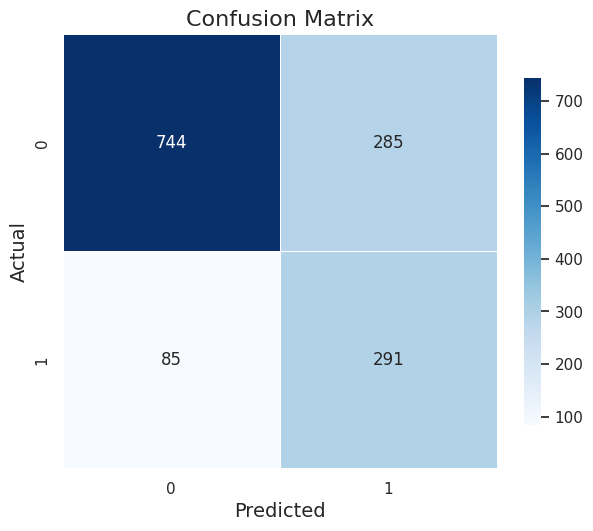

In [ ]:
# Call the function
model_en_1, x_test_en_1, y_test_en_1, binary_predictionen_1 = build_and_evaluate_model(x_train_part_1,y_train_part_1,"Enasampling with first part", epochs=100)

- In ensemble techniques, utilizing the first part from the majority class does not lead to an improvement in overall accuracy but the performance of recall, precision improved on class 1.

In [ ]:
# Second part from majority class
x_train_part_2,y_train_part_2=get_train_batch(1481,2962)

Epoch 1/100
93/93 [==============================] - 1s 2ms/step - loss: 0.5733 - accuracy: 0.7134
Epoch 2/100
93/93 [==============================] - 0s 2ms/step - loss: 0.5192 - accuracy: 0.7465
Epoch 3/100
93/93 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 0.7485
Epoch 4/100
93/93 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7569
Epoch 5/100
93/93 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7522
Epoch 6/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.7583
Epoch 7/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.7539
Epoch 8/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7579
Epoch 9/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7616
Epoch 10/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7698
Epoch 11/

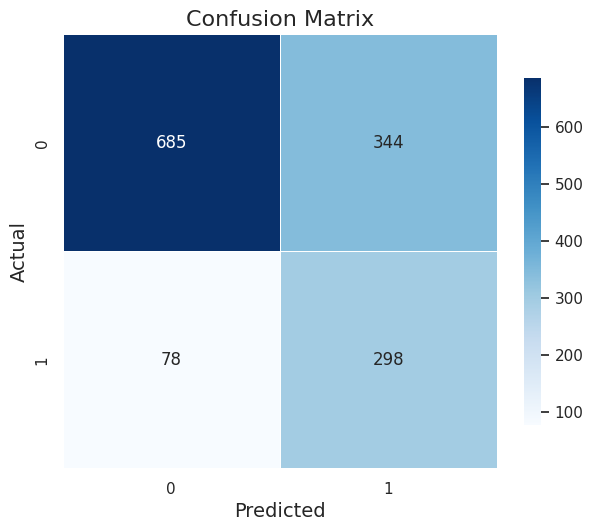

In [ ]:
# Call the function
model_en_2, x_test_en_2, y_test_en_2, binary_predictionen_2 = build_and_evaluate_model(x_train_part_2,y_train_part_2,"Enasampling with second part", epochs=100)

- While the recall for class 1 have improved, the overall accuracy and precision , f1-score on claas 1 has decreased.

In [ ]:
# Third part from majority class
x_train_part_3,y_train_part_3=get_train_batch(2962,4135)

Epoch 1/100
83/83 [==============================] - 2s 3ms/step - loss: 0.6039 - accuracy: 0.6858
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.7555
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.7702
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7698
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7735
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7698
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.7709
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.7698
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.7724
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.7724
Epoch 11/

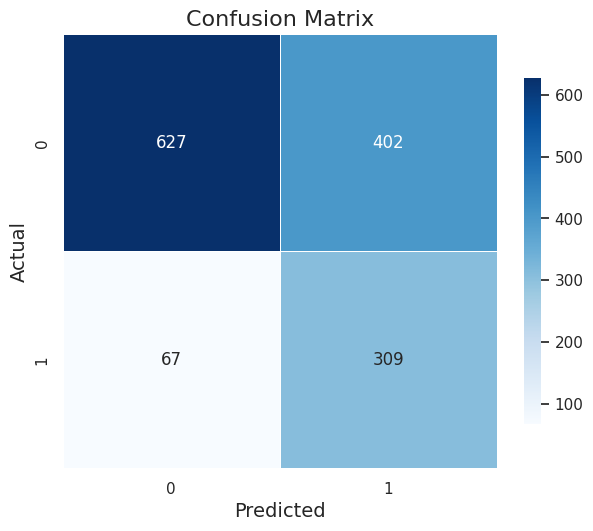

In [ ]:
# Call the function
model_en_3, x_test_en_3, y_test_en_3, binary_predictionen_3 = build_and_evaluate_model(x_train_part_3,y_train_part_3,"Enasampling with third part", epochs=100)

- While the recall for class 1 have improved, the overall accuracy and precision , f1-score on claas 1 has decreased.

# **Machine Learning Models**

Build a set of machine learning models with hyperparameter tuning for each one.

In [ ]:
# Split the data into training and testing sets based on SMOTE data
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)
# Define models
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'KNeighbors':KNeighborsClassifier(),
    'SVM': SVC()
}

# Define hyperparameter grids for each model
param_grids = {
    'DecisionTree': {'max_depth': [None, 5, 10, 15]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]},
    'KNeighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# Perform hyperparameter tuning and training for each model
for model_name, model in models.items():
    param_grid = param_grids[model_name]

    # Use GridSearchCV for exhaustive search over specified parameter values
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters and their corresponding accuracy
    print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")

    # Evaluate the model on the test set using the best hyperparameters
    y_pred = grid_search.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on the test set: {accuracy:.4f}")
    print("\n")


Best hyperparameters for DecisionTree: {'max_depth': 10}
Accuracy on the test set: 0.7904


Best hyperparameters for RandomForest: {'max_depth': None, 'n_estimators': 100}
Accuracy on the test set: 0.8296


Best hyperparameters for KNeighbors: {'n_neighbors': 5, 'weights': 'distance'}
Accuracy on the test set: 0.8049


Best hyperparameters for SVM: {'C': 10, 'kernel': 'rbf'}
Accuracy on the test set: 0.8170




**Result**

- Oversampling, undersampling, and SMOTE techniques help address class imbalance and enhance performance, particularly for class 1, when compared to the first trial .

- After conducting several experiments, the model that demonstrated the highest performance was the Deep Learning model with the application of the Oversampling technique to solve the imbalance problem